In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import sys, os, math, sqlite3
import emosent, emoji, string
from nltk import sentiment
import datetime, time, re, string

In C:\Users\Kyle\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Kyle\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Kyle\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\Kyle\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\Kyle\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [4]:
nltk.download('averaged_perceptron_tagger')

NameError: name 'nltk' is not defined

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag

In [5]:
expansive_emoji_dict = emoji.UNICODE_EMOJI

In [6]:
available_emoji_sentiments = emosent.EMOJI_SENTIMENT_DICT

In [7]:
sent_dict = {"Symbol":[], "Score":[], "Name":[]}
for k, v in available_emoji_sentiments.items():
    sent_dict["Symbol"].append(k)
    sent_dict["Score"].append(v["sentiment_score"])
    try:
        sent_dict["Name"].append(expansive_emoji_dict[k].replace(":", ""))
    except:
        sent_dict["Name"].append(np.nan)

In [8]:
available_sents_df = pd.DataFrame(sent_dict).dropna().reset_index(drop=True)

11748 | INFO | Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
11748 | INFO | NumExpr defaulting to 8 threads.


In [9]:
available_sents_df.head(20)

,Symbol,Score,Name
0,😂,0.221,face_with_tears_of_joy
1,❤,0.746,red_heart
2,♥,0.658,heart_suit
3,😍,0.678,smiling_face_with_heart-eyes
4,😭,-0.093,loudly_crying_face
5,😘,0.702,face_blowing_a_kiss
6,😊,0.645,smiling_face_with_smiling_eyes
7,👌,0.564,OK_hand
8,💕,0.633,two_hearts
9,👏,0.521,clapping_hands


In [10]:
available_sents_df.sort_values("Name").reset_index(drop=True, inplace=True)

In [11]:
available_sents_df=available_sents_df.sort_values("Name").reset_index(drop=True)

In [12]:
available_sents_df.loc[[175, 227, 337, 377, 403, 404, 514, 572], :]

,Symbol,Score,Name
175,😢,0.007,crying_face
227,😤,-0.211,face_with_steam_from_nose
337,💯,0.121,hundred_points
377,😭,-0.093,loudly_crying_face
403,💰,0.256,money_bag
404,💸,0.167,money_with_wings
514,😡,-0.173,pouting_face
572,🚀,0.525,rocket


In [13]:
available_sents_df.loc[175, "Score"] = -.45
available_sents_df.loc[227, "Score"] = -.405
available_sents_df.loc[337, "Score"] = .635
available_sents_df.loc[377, "Score"] = -.323
available_sents_df.loc[403, "Score"] = .596
available_sents_df.loc[404, "Score"] = .500
available_sents_df.loc[514, "Score"] = -.404
available_sents_df.loc[572, "Score"] = .645

In [14]:
available_sents_df.loc[753, "Score"] = .302

In [15]:
sia = sentiment.SentimentIntensityAnalyzer()

In [16]:
lexicon = sia.lexicon

In [17]:
lex_df = pd.DataFrame({"token": lexicon.keys(),
             "values": lexicon.values()})#.plot(kind="hist", y="values")

In [18]:
lex_df.sort_values("values").tail(15)

,token,values
2634,euphoric,3.2
4448,lovingly,3.2
4983,paradise,3.2
3285,glee,3.2
4439,love,3.2
3308,glorious,3.2
2492,elated,3.2
2470,ecstacy,3.3
6539,sweetheart,3.3
2633,euphoria,3.3


In [19]:
lex_df.sort_values("values").head(35)

,token,values
5465,rapist,-3.9
6092,slavery,-3.8
5464,raping,-3.8
4254,kill,-3.7
4720,murder,-3.7
238,fu,-3.7
5458,rape,-3.7
6644,terrorist,-3.7
4724,murderer,-3.6
5461,rapers,-3.6


In [57]:
# emojis should straddle the line of -3.5 and 3.2 so as to not overly index them to the poles of English Words extremes (bad emojis equivalent to cursing)
def lexnormScores(score):
    if score > 0:
        return round(score * 3.2, 1)
    else:
        return round(score * 3.4, 1)

In [21]:
available_sents_df = available_sents_df.assign(lexScore = lambda x: x.Score.apply(lexnormScores))

In [22]:
def lexify(name):
    if "_" in name:
        return name.lower()
    else:
        return "_" + name.lower()

In [23]:
available_sents_df = available_sents_df.assign(lexName = lambda x: x.Name.apply(lexify))

In [24]:
available_sents_df

,Symbol,Score,Name,lexScore,lexName
0,🏧,1.000,ATM_sign,3.2,atm_sign
1,🅰,0.333,A_button_(blood_type),1.1,a_button_(blood_type)
2,♈,-1.000,Aries,-3.4,_aries
3,🔙,0.217,BACK_arrow,0.7,back_arrow
4,🅱,0.000,B_button_(blood_type),0.0,b_button_(blood_type)
...,...,...,...,...,...
751,✍,1.000,writing_hand,3.2,writing_hand
752,💛,0.713,yellow_heart,2.3,yellow_heart
753,💴,0.302,yen_banknote,1.0,yen_banknote
754,☯,0.001,yin_yang,0.0,yin_yang


<h1 style="color: green; text-align: center">Process Flow</h1>
<ul style="text-align: left">
    <li style="color: green">Get Emoji Sentiment Where I can From Emosent module (replace spaces with _ ) -> enter into Vader lexicon as lowercase to keep upcase polarity diff that comes with VADER</li>
    <li style="color: green">Find Missing Emojis that are referenced in our sample: Enter them into the lexicon based on apparent sentiment of surrounding comment/context</li>
    <li style="color: green">Remove stop words from my Mentioned Stocks catcher</li>
    <li style="color: green">Show distribution of comments before emoji breakdown and after emoji breakdown</li>
    <li style="color: green">Move on to the most common words in our sample. Improve the OOTB Vader SIA to the enviroment of our current messages --> ENTER NEW WORDS INTO VADER LEXICON</li>
    <li style="color: green">In the end from our sample, we would like sentiment scores of comment (compound polarity scores), mentioned stocks (polarity of comments and amount of mentions) which can be integrated into our updatable dashboard that will help traders understand the private chat enviroment amongst traded equities, so that they can use this information as another tool in their toolbelt for their trading decisions.</li>
    <ul>

In [25]:
conn = sqlite3.connect("data/discord/discord.db")

In [26]:
comments_df = pd.read_sql("SELECT * FROM DiscordCommentsThursdayData", con=conn)

In [27]:
conn.close()

In [28]:
all_emojis_dict = emoji.UNICODE_EMOJI

In [29]:
emoji_sent_dict = emosent.EMOJI_SENTIMENT_DICT

In [30]:
# Ticker Info
nasdaqtickers = pd.read_csv("./data/listedCompanies/nasdaqtraded.txt", sep="|")
moretickers = pd.read_csv("./data/listedCompanies/otherlisted.txt", sep="|")

In [31]:
nasdaqtickers.groupby("Listing Exchange").count()

,Nasdaq Traded,Symbol,Security Name,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Listing Exchange,,,,,,,,,,,
A,298,298,298,298,298,298,298,0,298,298,298
N,3280,3280,3280,3280,3280,3280,3280,0,3280,3280,3280
P,1554,1554,1554,1554,1554,1554,1554,0,1554,1554,1554
Q,3851,3851,3851,3851,3851,3851,3851,3851,0,3851,3851
V,3,3,3,3,3,3,3,0,3,3,3
Z,418,418,418,418,418,418,418,0,418,418,418


In [32]:
moretickers.groupby("Exchange").count()

,ACT Symbol,Security Name,CQS Symbol,ETF,Round Lot Size,Test Issue,NASDAQ Symbol
Exchange,,,,,,,
A,298,298,298,298,298,298,298
N,3280,3280,3280,3280,3280,3280,3280
P,1554,1554,1554,1554,1554,1554,1554
V,3,3,3,3,3,3,3
Z,418,418,418,418,418,418,418


In [33]:
nasdaqtickers[nasdaqtickers["Symbol"] != nasdaqtickers["NASDAQ Symbol"]]

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
10,Y,AAIC$B,Arlington Asset Investment Corp 7.00%,N,,N,100,N,NaN,AAICpB,AAIC-B,N
11,Y,AAIC$C,Arlington Asset Investment Corp 8.250% Seies C...,N,,N,100,N,NaN,AAICpC,AAIC-C,N
39,Y,ABR$A,Arbor Realty Trust Preferred Series A,N,,N,100,N,NaN,ABRpA,ABR-A,N
40,Y,ABR$B,Arbor Realty Trust Cumulative Redeemable Prefe...,N,,N,100,N,NaN,ABRpB,ABR-B,N
41,Y,ABR$C,Arbor Realty Trust Cumulative Redeemable Prefe...,N,,N,100,N,NaN,ABRpC,ABR-C,N
...,...,...,...,...,...,...,...,...,...,...,...,...
9208,Y,XAN$C,Exantas Capital Corp.,N,,N,100,N,NaN,XANpC,XAN-C,N
9273,Y,XPOA.U,"DPCM Capital, Inc. Units, each consisting of o...",N,,N,100,N,NaN,XPOA.U,XPOA=,N
9303,Y,YAC.U,"Yucaipa Acquisition Corporation Units, each co...",N,,N,100,N,NaN,YAC.U,YAC=,N
9304,Y,YAC.W,Yucaipa Acquisition Corporation Redeemable War...,N,,N,100,N,NaN,YAC.WS,YAC+,N


In [34]:
tickerInfo = nasdaqtickers[nasdaqtickers["Test Issue"] != "Y"]

In [35]:
tickerInfo.shape

(9370, 12)

In [36]:
conn = sqlite3.connect("data/discord/text.db")
comments_df2 = pd.read_sql("SELECT * FROM text_588270137874841620_588284257491877889", con=conn) # original data
conn.close()

In [37]:
comments_df2

,id,name,content,timestamp
0,488359813160501251,Merente#5844,Thanks <@464449226521313292> ! I opted for th...,2020-11-30T20:48:43.035000+00:00
1,689681229989150742,jackaplan#7289,Barely followed the market at all today (didn’...,2020-11-30T20:58:32.872000+00:00
2,612337363326074936,Trademate#2515,<@131952052069728258> has reached level **13**!,2020-11-30T19:55:20.913000+00:00
3,488359813160501251,Merente#5844,Thanks <@464449226521313292> ! I opted for th...,2020-11-30T20:48:43.035000+00:00
4,689681229989150742,jackaplan#7289,Barely followed the market at all today (didn’...,2020-11-30T20:58:32.872000+00:00
...,...,...,...,...
38255,579205396166737921,beenpippinsincebeenpippin#4039,@everyone today’s total. This doesn’t calculat...,2019-08-02T01:13:47.923000+00:00
38256,579205396166737921,beenpippinsincebeenpippin#4039,Play account today,2019-08-02T01:10:52.637000+00:00
38257,385261276986605568,Sporadic#0001,@everyone,2019-08-02T01:11:08.694000+00:00
38258,579205396166737921,beenpippinsincebeenpippin#4039,Play account today,2019-08-02T01:10:52.637000+00:00


In [38]:
comments_df2=comments_df2.drop_duplicates()

In [39]:
comments_df2=comments_df2.assign(Datetime = lambda x: x.timestamp.apply(datetime.datetime.fromisoformat))

In [40]:
def easternize(dt):
    return dt.tz_convert("est")

In [41]:
def timeofday(h):
    return h.hour + (h.minute / 60)

In [42]:
comments_df2 = comments_df2.assign(EasternDT = lambda x: x.Datetime.apply(easternize))

In [43]:
comments_df2  = comments_df2.assign(Hours = lambda x: x.EasternDT.apply(timeofday))

In [44]:
comments_df2

,id,name,content,timestamp,Datetime,EasternDT,Hours
0,488359813160501251,Merente#5844,Thanks <@464449226521313292> ! I opted for th...,2020-11-30T20:48:43.035000+00:00,2020-11-30 20:48:43.035000+00:00,2020-11-30 15:48:43.035000-05:00,15.800000
1,689681229989150742,jackaplan#7289,Barely followed the market at all today (didn’...,2020-11-30T20:58:32.872000+00:00,2020-11-30 20:58:32.872000+00:00,2020-11-30 15:58:32.872000-05:00,15.966667
2,612337363326074936,Trademate#2515,<@131952052069728258> has reached level **13**!,2020-11-30T19:55:20.913000+00:00,2020-11-30 19:55:20.913000+00:00,2020-11-30 14:55:20.913000-05:00,14.916667
5,131952052069728258,Teecee#3022,<@!464449226521313292> thanks boss,2020-11-30T19:55:20.625000+00:00,2020-11-30 19:55:20.625000+00:00,2020-11-30 14:55:20.625000-05:00,14.916667
9,464449226521313292,TradingJEDI#2647,<@!399198468159045633> BRO AWSOME SO GLAD YOU ...,2020-11-30T19:44:26.516000+00:00,2020-11-30 19:44:26.516000+00:00,2020-11-30 14:44:26.516000-05:00,14.733333
...,...,...,...,...,...,...,...
38226,445583268792893449,itsyoboyvic#7198,Big crack,2019-08-02T01:14:39.682000+00:00,2019-08-02 01:14:39.682000+00:00,2019-08-01 20:14:39.682000-05:00,20.233333
38231,445583268792893449,itsyoboyvic#7198,Crack,2019-08-02T01:14:35.798000+00:00,2019-08-02 01:14:35.798000+00:00,2019-08-01 20:14:35.798000-05:00,20.233333
38236,579205396166737921,beenpippinsincebeenpippin#4039,@everyone today’s total. This doesn’t calculat...,2019-08-02T01:13:47.923000+00:00,2019-08-02 01:13:47.923000+00:00,2019-08-01 20:13:47.923000-05:00,20.216667
38245,385261276986605568,Sporadic#0001,@everyone,2019-08-02T01:11:08.694000+00:00,2019-08-02 01:11:08.694000+00:00,2019-08-01 20:11:08.694000-05:00,20.183333


In [45]:
# Bot congrats
botCom = re.compile("\shas reached level \*\*.\d+\*\*")
bot2Com = re.compile("Congrats \<.*\>, you just advanced to")

In [46]:
def catchBot(c):
    botreg = botCom.search(c)
    botreg1 = bot2Com.search(c.strip())
    if (botreg != None) or (botreg1 != None):
        return 1
    else:
        return 0

In [47]:
comments_df2=comments_df2.assign(IsBot = lambda x: x.content.apply(catchBot))

In [48]:
comments_df2.groupby("IsBot").count()

,id,name,content,timestamp,Datetime,EasternDT,Hours
IsBot,,,,,,,
0,5029,5029,5029,5029,5029,5029,5029
1,52,52,52,52,52,52,52


In [49]:
real_comments_df = comments_df2[comments_df2.IsBot == 0]#.reset_index(drop=True)

In [50]:
real_comments_df

,id,name,content,timestamp,Datetime,EasternDT,Hours,IsBot
0,488359813160501251,Merente#5844,Thanks <@464449226521313292> ! I opted for th...,2020-11-30T20:48:43.035000+00:00,2020-11-30 20:48:43.035000+00:00,2020-11-30 15:48:43.035000-05:00,15.800000,0
1,689681229989150742,jackaplan#7289,Barely followed the market at all today (didn’...,2020-11-30T20:58:32.872000+00:00,2020-11-30 20:58:32.872000+00:00,2020-11-30 15:58:32.872000-05:00,15.966667,0
5,131952052069728258,Teecee#3022,<@!464449226521313292> thanks boss,2020-11-30T19:55:20.625000+00:00,2020-11-30 19:55:20.625000+00:00,2020-11-30 14:55:20.625000-05:00,14.916667,0
9,464449226521313292,TradingJEDI#2647,<@!399198468159045633> BRO AWSOME SO GLAD YOU ...,2020-11-30T19:44:26.516000+00:00,2020-11-30 19:44:26.516000+00:00,2020-11-30 14:44:26.516000-05:00,14.733333,0
13,399198468159045633,AjKilgore#0424,<@!464449226521313292> might have sold a bit ...,2020-11-30T19:30:11.004000+00:00,2020-11-30 19:30:11.004000+00:00,2020-11-30 14:30:11.004000-05:00,14.500000,0
...,...,...,...,...,...,...,...,...
38226,445583268792893449,itsyoboyvic#7198,Big crack,2019-08-02T01:14:39.682000+00:00,2019-08-02 01:14:39.682000+00:00,2019-08-01 20:14:39.682000-05:00,20.233333,0
38231,445583268792893449,itsyoboyvic#7198,Crack,2019-08-02T01:14:35.798000+00:00,2019-08-02 01:14:35.798000+00:00,2019-08-01 20:14:35.798000-05:00,20.233333,0
38236,579205396166737921,beenpippinsincebeenpippin#4039,@everyone today’s total. This doesn’t calculat...,2019-08-02T01:13:47.923000+00:00,2019-08-02 01:13:47.923000+00:00,2019-08-01 20:13:47.923000-05:00,20.216667,0
38245,385261276986605568,Sporadic#0001,@everyone,2019-08-02T01:11:08.694000+00:00,2019-08-02 01:11:08.694000+00:00,2019-08-01 20:11:08.694000-05:00,20.183333,0


In [51]:
real_comments_df

,id,name,content,timestamp,Datetime,EasternDT,Hours,IsBot
0,488359813160501251,Merente#5844,Thanks <@464449226521313292> ! I opted for th...,2020-11-30T20:48:43.035000+00:00,2020-11-30 20:48:43.035000+00:00,2020-11-30 15:48:43.035000-05:00,15.800000,0
1,689681229989150742,jackaplan#7289,Barely followed the market at all today (didn’...,2020-11-30T20:58:32.872000+00:00,2020-11-30 20:58:32.872000+00:00,2020-11-30 15:58:32.872000-05:00,15.966667,0
5,131952052069728258,Teecee#3022,<@!464449226521313292> thanks boss,2020-11-30T19:55:20.625000+00:00,2020-11-30 19:55:20.625000+00:00,2020-11-30 14:55:20.625000-05:00,14.916667,0
9,464449226521313292,TradingJEDI#2647,<@!399198468159045633> BRO AWSOME SO GLAD YOU ...,2020-11-30T19:44:26.516000+00:00,2020-11-30 19:44:26.516000+00:00,2020-11-30 14:44:26.516000-05:00,14.733333,0
13,399198468159045633,AjKilgore#0424,<@!464449226521313292> might have sold a bit ...,2020-11-30T19:30:11.004000+00:00,2020-11-30 19:30:11.004000+00:00,2020-11-30 14:30:11.004000-05:00,14.500000,0
...,...,...,...,...,...,...,...,...
38226,445583268792893449,itsyoboyvic#7198,Big crack,2019-08-02T01:14:39.682000+00:00,2019-08-02 01:14:39.682000+00:00,2019-08-01 20:14:39.682000-05:00,20.233333,0
38231,445583268792893449,itsyoboyvic#7198,Crack,2019-08-02T01:14:35.798000+00:00,2019-08-02 01:14:35.798000+00:00,2019-08-01 20:14:35.798000-05:00,20.233333,0
38236,579205396166737921,beenpippinsincebeenpippin#4039,@everyone today’s total. This doesn’t calculat...,2019-08-02T01:13:47.923000+00:00,2019-08-02 01:13:47.923000+00:00,2019-08-01 20:13:47.923000-05:00,20.216667,0
38245,385261276986605568,Sporadic#0001,@everyone,2019-08-02T01:11:08.694000+00:00,2019-08-02 01:11:08.694000+00:00,2019-08-01 20:11:08.694000-05:00,20.183333,0


In [52]:
comments = real_comments_df.content.values

In [53]:
comments

array(['Thanks <@464449226521313292> !  I opted for the protection on this which limited my profits but not much.  Still a 30% trade for me!',
       'Barely followed the market at all today (didn’t like the price action) but I’ll take $160 any day',
       '<@!464449226521313292> thanks boss', ...,
       '@everyone today’s total. This doesn’t calculate the after hours earnings strangles. They will be included in tomorrow’s profit.',
       '@everyone', 'Play account today'], dtype=object)

In [60]:
available_sents_df

,Symbol,Score,Name,lexScore,lexName
0,🏧,1.000,ATM_sign,3.2,atm_sign
1,🅰,0.333,A_button_(blood_type),1.1,a_button_(blood_type)
2,♈,-1.000,Aries,-3.4,_aries
3,🔙,0.217,BACK_arrow,0.7,back_arrow
4,🅱,0.000,B_button_(blood_type),0.0,b_button_(blood_type)
...,...,...,...,...,...
751,✍,1.000,writing_hand,3.2,writing_hand
752,💛,0.713,yellow_heart,2.3,yellow_heart
753,💴,0.302,yen_banknote,1.0,yen_banknote
754,☯,0.001,yin_yang,0.0,yin_yang


In [72]:
used_emotes = {}
needed_Emotes = []
for com in comments:
    emoji_catcher = emoji.emoji_lis(com)
    if emoji_catcher != []:
        for e in emoji_catcher:
            name = expansive_emoji_dict[e["emoji"]]
            if ("skin_tone" in name) or ("regional_indicator_" in name):
                    next
            elif (":male_sign:" == name) or (":female_sign:" == name):
                    next
            else:
                if e["emoji"] not in used_emotes.keys():
                    used_emotes[e["emoji"]] = {}
                    used_emotes[e["emoji"]]["value"] = 1
                    used_emotes[e["emoji"]]["name"] = name
                    if e["emoji"] in available_emoji_sentiments.keys():
                        used_emotes[e["emoji"]]["hasScore"] = True
                        used_emotes[e["emoji"]]["prospectiveScore"] = available_sents_df[available_sents_df.Symbol == e["emoji"]].lexScore.values[0]
                        
                    else:
                        used_emotes[e["emoji"]]["hasScore"] = False
                        needed_Emotes.append(e["emoji"])
                else:
                    used_emotes[e["emoji"]]["value"] += 1
                    used_emotes[e["emoji"]]["name"] = name
        

In [73]:
available_sents_df[available_sents_df.Symbol == "💯"].lexScore.values[0]

2.0

In [74]:
used_emotes

{'💯': {'value': 24,
  'name': ':hundred_points:',
  'hasScore': True,
  'prospectiveScore': 2.0},
 '🤞': {'value': 1, 'name': ':crossed_fingers:', 'hasScore': False},
 '🤣': {'value': 9,
  'name': ':rolling_on_the_floor_laughing:',
  'hasScore': False},
 '👇': {'value': 18,
  'name': ':backhand_index_pointing_down:',
  'hasScore': True,
  'prospectiveScore': 0.8},
 '😭': {'value': 6,
  'name': ':loudly_crying_face:',
  'hasScore': True,
  'prospectiveScore': -1.1},
 '👍': {'value': 33,
  'name': ':thumbs_up:',
  'hasScore': True,
  'prospectiveScore': 1.7},
 '🙏': {'value': 51,
  'name': ':folded_hands:',
  'hasScore': True,
  'prospectiveScore': 1.3},
 '😉': {'value': 23,
  'name': ':winking_face:',
  'hasScore': True,
  'prospectiveScore': 1.5},
 '🙂': {'value': 24, 'name': ':slightly_smiling_face:', 'hasScore': False},
 '👀': {'value': 11,
  'name': ':eyes:',
  'hasScore': True,
  'prospectiveScore': 0.2},
 '😂': {'value': 50,
  'name': ':face_with_tears_of_joy:',
  'hasScore': True,
  'prosp

In [75]:
as_df = available_sents_df.loc[:, ["Symbol", "lexScore", "lexName"]]

In [76]:
emosent_emoj = as_df.Symbol.values

In [77]:
scores = as_df.lexScore.values

In [78]:
names = as_df.lexName.values

In [79]:
emosent_emoj_dict = {}
for i, e in enumerate(emosent_emoj):
    emosent_emoj_dict[e] = {}
    emosent_emoj_dict[e]["score"] = scores[i]
    emosent_emoj_dict[e]["lexname"] = names[i]

In [80]:
emosent_emoj_dict

{'🏧': {'score': 3.2, 'lexname': 'atm_sign'},
 '🅰': {'score': 1.1, 'lexname': 'a_button_(blood_type)'},
 '♈': {'score': -3.4, 'lexname': '_aries'},
 '🔙': {'score': 0.7, 'lexname': 'back_arrow'},
 '🅱': {'score': 0.0, 'lexname': 'b_button_(blood_type)'},
 '🆑': {'score': 0.0, 'lexname': 'cl_button'},
 '🆒': {'score': 1.3, 'lexname': 'cool_button'},
 '♋': {'score': 1.1, 'lexname': '_cancer'},
 '🎄': {'score': 1.7, 'lexname': 'christmas_tree'},
 '🔚': {'score': 1.4, 'lexname': 'end_arrow'},
 '🆓': {'score': 0.8, 'lexname': 'free_button'},
 '♊': {'score': 0.0, 'lexname': '_gemini'},
 '🆔': {'score': 3.0, 'lexname': 'id_button'},
 '🉐': {'score': 3.2, 'lexname': 'japanese_bargain_button'},
 '🏯': {'score': 0.5, 'lexname': 'japanese_castle'},
 '🈹': {'score': 1.1, 'lexname': 'japanese_discount_button'},
 '🎎': {'score': 3.1, 'lexname': 'japanese_dolls'},
 '🈂': {'score': -3.4, 'lexname': 'japanese_service_charge_button'},
 '🔰': {'score': 0.0, 'lexname': 'japanese_symbol_for_beginner'},
 '♌': {'score': 2.

In [81]:
needed_Emotes

['🤞',
 '🤣',
 '🙂',
 '🤩',
 '🤑',
 '🤠',
 '🥳',
 '🛫',
 '🤦',
 '🤫',
 '\U0001f9be',
 '🥰',
 '🤔',
 '🤙',
 '🧠',
 '🤝',
 '🧐',
 '🤧',
 '🥺',
 '\U0001f9c3',
 '🤤',
 '🤬',
 '🤯',
 '🤗',
 '🛥',
 '🖐',
 '🤷',
 '🕵',
 '🤘',
 '🦕']

In [82]:
emComm_comments = []
for c in comments:
    elist = emoji.emoji_lis(c)
    for e in elist:
        if e["emoji"] in needed_Emotes:
            emComm_comments.append(c)

In [83]:
emComm_comments

['<@703659646279483503> <@!579205396166737921> 💯🤞🏾',
 '<@579205396166737921> not sure why someone bought one of my ACB contracts for 3.7 but I bought it back for $52 less a few minutes later 🤣',
 '🙂',
 "> <@!629362548919107584> damn. you're insane with that growth!\n<@!680245219706667048> i had a bit of luck on my side 🙂",
 'baby gains 🙂',
 '🤩',
 'Unity 🤑',
 'yessir another one. I do it for trademate ig 🤑🤑',
 'yessir another one. I do it for trademate ig 🤑🤑',
 'Finally some green🤠🤠 Just got enough money for another month here on TM <:zuckstocksup:756648506047070259> \nThanks to <@!579205396166737921>',
 'Finally some green🤠🤠 Just got enough money for another month here on TM <:zuckstocksup:756648506047070259> \nThanks to <@!579205396166737921>',
 'Small acc challenge 🤑',
 '<@!579205396166737921> I’ve got a challenge, turn my 2.5k account into 10k 🤣',
 'page bouta be flooded w fat snap gains tmo 🤑🤑',
 'page bouta be flooded w fat snap gains tmo 🤑🤑',
 'TP too early and still walked away 

In [84]:
emoji_lex2 = {}
for n in needed_Emotes:
    name = expansive_emoji_dict[n].replace(":", "")
    if "_" not in name:
        name = "_" + name
    emoji_lex2[n] = {}
    emoji_lex2[n]["lexName"] = name

In [85]:
emoji_lex2

{'🤞': {'lexName': 'crossed_fingers'},
 '🤣': {'lexName': 'rolling_on_the_floor_laughing'},
 '🙂': {'lexName': 'slightly_smiling_face'},
 '🤩': {'lexName': '_star-struck'},
 '🤑': {'lexName': 'money-mouth_face'},
 '🤠': {'lexName': 'cowboy_hat_face'},
 '🥳': {'lexName': 'partying_face'},
 '🛫': {'lexName': 'airplane_departure'},
 '🤦': {'lexName': 'person_facepalming'},
 '🤫': {'lexName': 'shushing_face'},
 '\U0001f9be': {'lexName': 'mechanical_arm'},
 '🥰': {'lexName': 'smiling_face_with_3_hearts'},
 '🤔': {'lexName': 'thinking_face'},
 '🤙': {'lexName': 'call_me_hand'},
 '🧠': {'lexName': '_brain'},
 '🤝': {'lexName': '_handshake'},
 '🧐': {'lexName': 'face_with_monocle'},
 '🤧': {'lexName': 'sneezing_face'},
 '🥺': {'lexName': 'pleading_face'},
 '\U0001f9c3': {'lexName': 'beverage_box'},
 '🤤': {'lexName': 'drooling_face'},
 '🤬': {'lexName': 'face_with_symbols_on_mouth'},
 '🤯': {'lexName': 'exploding_head'},
 '🤗': {'lexName': 'hugging_face'},
 '🛥': {'lexName': 'motor_boat'},
 '🖐': {'lexName': 'hand_wi

In [86]:
emoji_lex2 = {'🤞': {'lexName': 'crossed_fingers', "value": 0.4},
 '🤣': {'lexName': 'rolling_on_the_floor_laughing', "value": 2.7},
 '🙂': {'lexName': 'slightly_smiling_face', "value": 1.0},
 '🤩': {'lexName': '_star-struck', "value": 1.4},
 '🤑': {'lexName': 'money-mouth_face', "value": 2.5},
 '🤠': {'lexName': 'cowboy_hat_face', "value": 2.1},
 '🥳': {'lexName': 'partying_face', "value": 1.7},
 '🛫': {'lexName': 'airplane_departure', "value": 1.5},
 '🤦': {'lexName': 'person_facepalming', "value":-1.5},
 '🤫': {'lexName': 'shushing_face', "value": 0.3},
 '\U0001f9be': {'lexName': 'mechanical_arm', "value": 1.8},
 '🥰': {'lexName': 'smiling_face_with_3_hearts', "value": 2.3},
 '🤔': {'lexName': 'thinking_face', "value": 0.1},
 '🤙': {'lexName': 'call_me_hand', "value": 1.3},
 '🧠': {'lexName': '_brain', "value": 1.7},
 '🤝': {'lexName': '_handshake', "value": 1.5},
 '🧐': {'lexName': 'face_with_monocle', "value": 1.7},
 '🤧': {'lexName': 'sneezing_face', "value": -1.2},
 '🥺': {'lexName': 'pleading_face', "value": -0.5},
 '\U0001f9c3': {'lexName': 'beverage_box', "value": 2.0},
 '🤤': {'lexName': 'drooling_face', "value": 1.2},
 '🤬': {'lexName': 'face_with_symbols_on_mouth', "value": -2.2},
 '🤯': {'lexName': 'exploding_head', "value": .6},
 '🤗': {'lexName': 'hugging_face', "value": 2.0},
 '🛥': {'lexName': 'motor_boat', "value": 2.1},
 '🖐': {'lexName': 'hand_with_fingers_splayed', "value": 0.5},
 '🤷': {'lexName': 'person_shrugging', "value": -0.4},
 '🕵': {'lexName': '_detective', "value": 1.3},
 '🤘': {'lexName': 'sign_of_the_horns', "value": 1.3},
 '🦕': {'lexName': '_sauropod', "value": 1.5}
}

In [87]:
lexicon["idk"]

-0.4

In [88]:
used_emotes

{'💯': {'value': 24,
  'name': ':hundred_points:',
  'hasScore': True,
  'prospectiveScore': 2.0},
 '🤞': {'value': 1, 'name': ':crossed_fingers:', 'hasScore': False},
 '🤣': {'value': 9,
  'name': ':rolling_on_the_floor_laughing:',
  'hasScore': False},
 '👇': {'value': 18,
  'name': ':backhand_index_pointing_down:',
  'hasScore': True,
  'prospectiveScore': 0.8},
 '😭': {'value': 6,
  'name': ':loudly_crying_face:',
  'hasScore': True,
  'prospectiveScore': -1.1},
 '👍': {'value': 33,
  'name': ':thumbs_up:',
  'hasScore': True,
  'prospectiveScore': 1.7},
 '🙏': {'value': 51,
  'name': ':folded_hands:',
  'hasScore': True,
  'prospectiveScore': 1.3},
 '😉': {'value': 23,
  'name': ':winking_face:',
  'hasScore': True,
  'prospectiveScore': 1.5},
 '🙂': {'value': 24, 'name': ':slightly_smiling_face:', 'hasScore': False},
 '👀': {'value': 11,
  'name': ':eyes:',
  'hasScore': True,
  'prospectiveScore': 0.2},
 '😂': {'value': 50,
  'name': ':face_with_tears_of_joy:',
  'hasScore': True,
  'prosp

In [89]:
emosent_emoj_dict

{'🏧': {'score': 3.2, 'lexname': 'atm_sign'},
 '🅰': {'score': 1.1, 'lexname': 'a_button_(blood_type)'},
 '♈': {'score': -3.4, 'lexname': '_aries'},
 '🔙': {'score': 0.7, 'lexname': 'back_arrow'},
 '🅱': {'score': 0.0, 'lexname': 'b_button_(blood_type)'},
 '🆑': {'score': 0.0, 'lexname': 'cl_button'},
 '🆒': {'score': 1.3, 'lexname': 'cool_button'},
 '♋': {'score': 1.1, 'lexname': '_cancer'},
 '🎄': {'score': 1.7, 'lexname': 'christmas_tree'},
 '🔚': {'score': 1.4, 'lexname': 'end_arrow'},
 '🆓': {'score': 0.8, 'lexname': 'free_button'},
 '♊': {'score': 0.0, 'lexname': '_gemini'},
 '🆔': {'score': 3.0, 'lexname': 'id_button'},
 '🉐': {'score': 3.2, 'lexname': 'japanese_bargain_button'},
 '🏯': {'score': 0.5, 'lexname': 'japanese_castle'},
 '🈹': {'score': 1.1, 'lexname': 'japanese_discount_button'},
 '🎎': {'score': 3.1, 'lexname': 'japanese_dolls'},
 '🈂': {'score': -3.4, 'lexname': 'japanese_service_charge_button'},
 '🔰': {'score': 0.0, 'lexname': 'japanese_symbol_for_beginner'},
 '♌': {'score': 2.

In [90]:
emoji_lex2

{'🤞': {'lexName': 'crossed_fingers', 'value': 0.4},
 '🤣': {'lexName': 'rolling_on_the_floor_laughing', 'value': 2.7},
 '🙂': {'lexName': 'slightly_smiling_face', 'value': 1.0},
 '🤩': {'lexName': '_star-struck', 'value': 1.4},
 '🤑': {'lexName': 'money-mouth_face', 'value': 2.5},
 '🤠': {'lexName': 'cowboy_hat_face', 'value': 2.1},
 '🥳': {'lexName': 'partying_face', 'value': 1.7},
 '🛫': {'lexName': 'airplane_departure', 'value': 1.5},
 '🤦': {'lexName': 'person_facepalming', 'value': -1.5},
 '🤫': {'lexName': 'shushing_face', 'value': 0.3},
 '\U0001f9be': {'lexName': 'mechanical_arm', 'value': 1.8},
 '🥰': {'lexName': 'smiling_face_with_3_hearts', 'value': 2.3},
 '🤔': {'lexName': 'thinking_face', 'value': 0.1},
 '🤙': {'lexName': 'call_me_hand', 'value': 1.3},
 '🧠': {'lexName': '_brain', 'value': 1.7},
 '🤝': {'lexName': '_handshake', 'value': 1.5},
 '🧐': {'lexName': 'face_with_monocle', 'value': 1.7},
 '🤧': {'lexName': 'sneezing_face', 'value': -1.2},
 '🥺': {'lexName': 'pleading_face', 'value'

In [91]:
emosent_emoj_dict["💯"]

{'score': 2.0, 'lexname': 'hundred_points'}

In [92]:
emote_codes = {}
for k in emosent_emoj_dict:
    lex = emosent_emoj_dict[k]["lexname"] # lex_dict name
    score = emosent_emoj_dict[k]["score"]
    emote_codes[lex] = score

In [93]:
for k in emoji_lex2:
    lex = emoji_lex2[k]["lexName"] # lex_dict name
    score = emoji_lex2[k]["value"]
    emote_codes[lex] = score

In [94]:
emote_codes

{'atm_sign': 3.2,
 'a_button_(blood_type)': 1.1,
 '_aries': -3.4,
 'back_arrow': 0.7,
 'b_button_(blood_type)': 0.0,
 'cl_button': 0.0,
 'cool_button': 1.3,
 '_cancer': 1.1,
 'christmas_tree': 1.7,
 'end_arrow': 1.4,
 'free_button': 0.8,
 '_gemini': 0.0,
 'id_button': 3.0,
 'japanese_bargain_button': 3.2,
 'japanese_castle': 0.5,
 'japanese_discount_button': 1.1,
 'japanese_dolls': 3.1,
 'japanese_service_charge_button': -3.4,
 'japanese_symbol_for_beginner': 0.0,
 '_leo': 2.7,
 '_libra': -0.5,
 'new_button': 0.0,
 'ng_button': 0.8,
 'ok_button': 1.9,
 'ok_hand': 1.8,
 'on!_arrow': 1.8,
 'o_button_(blood_type)': -0.7,
 '_pisces': 1.6,
 'soon_arrow': 1.0,
 'sos_button': 0.3,
 'santa_claus': 1.0,
 '_scorpio': 0.0,
 'statue_of_liberty': 1.2,
 'top_arrow': 1.5,
 'tokyo_tower': 1.9,
 'up!_button': 1.6,
 '_virgo': 2.1,
 'aerial_tramway': -1.7,
 '_airplane': 1.3,
 'alarm_clock': 1.7,
 '_alien': 1.0,
 'alien_monster': 1.2,
 '_ambulance': 0.3,
 'american_football': 1.7,
 '_anchor': 2.0,
 'anger

In [95]:
lexicon.update(emote_codes)

In [96]:
tickerInfo[tickerInfo.Symbol != tickerInfo["NASDAQ Symbol"]]

,Nasdaq Traded,Symbol,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
10,Y,AAIC$B,Arlington Asset Investment Corp 7.00%,N,,N,100,N,NaN,AAICpB,AAIC-B,N
11,Y,AAIC$C,Arlington Asset Investment Corp 8.250% Seies C...,N,,N,100,N,NaN,AAICpC,AAIC-C,N
39,Y,ABR$A,Arbor Realty Trust Preferred Series A,N,,N,100,N,NaN,ABRpA,ABR-A,N
40,Y,ABR$B,Arbor Realty Trust Cumulative Redeemable Prefe...,N,,N,100,N,NaN,ABRpB,ABR-B,N
41,Y,ABR$C,Arbor Realty Trust Cumulative Redeemable Prefe...,N,,N,100,N,NaN,ABRpC,ABR-C,N
...,...,...,...,...,...,...,...,...,...,...,...,...
9208,Y,XAN$C,Exantas Capital Corp.,N,,N,100,N,NaN,XANpC,XAN-C,N
9273,Y,XPOA.U,"DPCM Capital, Inc. Units, each consisting of o...",N,,N,100,N,NaN,XPOA.U,XPOA=,N
9303,Y,YAC.U,"Yucaipa Acquisition Corporation Units, each co...",N,,N,100,N,NaN,YAC.U,YAC=,N
9304,Y,YAC.W,Yucaipa Acquisition Corporation Redeemable War...,N,,N,100,N,NaN,YAC.WS,YAC+,N


In [97]:
ticker_translater = {}
for i, r in tickerInfo.iterrows():
    if r["Symbol"] != r["NASDAQ Symbol"]:
        sym = r["Symbol"].lower()
        nas_sym = r["NASDAQ Symbol"].lower()
        cqs_sym = r["CQS Symbol"].lower()
        ticker_translater[sym] = r["Security Name"]
        ticker_translater[nas_sym] = r["Security Name"]
        ticker_translater[cqs_sym] = r["Security Name"]
    else:
        sym = r["Symbol"].lower()
        ticker_translater[sym] = r["Security Name"]

In [98]:
!pwd

/c/Users/Kyle/Desktop/stockProject/demo-project/NLP


In [99]:
expansive_emoji_dict['🤣'].replace(":", "")

'rolling_on_the_floor_laughing'

In [100]:
def commentFactory(com):
    comment = com
    comment = comment.replace("\n", "")
    # handle mentions
    mention_pattern = "<[0-9!#&]*>"
    mentions = re.findall(mention_pattern, comment)
    if mentions != []: # replace mentions
        for m in mentions:
            comment = com.replace(m, "")
    emoji_list = emoji.emoji_lis(comment)
    # Handled Emotes: translate to their lexical representation
    if emoji_list != []:
        for emote in emoji_list:
            code = expansive_emoji_dict[emote["emoji"]]
            if ("skin_tone" in code) or ("regional_indicator_" in code):
                    next
            elif (":male_sign:" == code) or (":female_sign:" == code):
                    next
            code = code.replace(":", " ") # 'unstick' emotes
            comment = comment.replace(emote["emoji"], code)
#             if code not in emote_codes.keys(): # deal with unhandled emote
#                 if "_" not in code:
#                     code = "_" + code # single word emoji
#                 comment = comment.remove(code, "")
#                 sia.polarity_scores(comment)[""]
    sentiment_dict = sia.polarity_scores(comment)
#     scores_l = [sentiment_dict["neg"], sentiment_dict["neu"], sentiment_dict["pos"],  sentiment_dict["compound"]]
#     return ", ".join([s for s in scores_l])
    return sentiment_dict["compound"]

In [101]:
re.findall("<[@0-9!#]*>", comments[0])

['<@464449226521313292>']

In [102]:
comments[22]

'<@579205396166737921> not sure why someone bought one of my ACB contracts for 3.7 but I bought it back for $52 less a few minutes later 🤣'

In [103]:
ssample = comments[22]

In [104]:
mention_pattern = "<[@0-9!&#]*>"
mentions = re.findall(mention_pattern, ssample)
for m in mentions:
    ssample = ssample.replace(m, "")
emojis_ll = emoji.emoji_lis(ssample)
for e in emojis_ll:
    codex = expansive_emoji_dict[e["emoji"]].replace(":", "")
    ssample = ssample.replace(e["emoji"], codex) 
print(ssample)

 not sure why someone bought one of my ACB contracts for 3.7 but I bought it back for $52 less a few minutes later rolling_on_the_floor_laughing


In [105]:
sia.polarity_scores(comments[22])

{'neg': 0.063, 'neu': 0.937, 'pos': 0.0, 'compound': -0.1232}

In [106]:
# WITH EMOJI REPLACEMENT
sia.polarity_scores(ssample)

{'neg': 0.054, 'neu': 0.763, 'pos': 0.183, 'compound': 0.6777}

In [107]:
comments[22]

'<@579205396166737921> not sure why someone bought one of my ACB contracts for 3.7 but I bought it back for $52 less a few minutes later 🤣'

In [108]:
strings = "this is a sazzze sentence"

In [109]:
word_tokenize(comments[444])

['small', '$', 'gain', 'but', 'decent', '%', 'gain', '😂', 'all', 'adds', 'up']

In [110]:
comments[444]

'small $ gain but decent % gain 😂 all adds up'

In [111]:
emComm_comments

['<@703659646279483503> <@!579205396166737921> 💯🤞🏾',
 '<@579205396166737921> not sure why someone bought one of my ACB contracts for 3.7 but I bought it back for $52 less a few minutes later 🤣',
 '🙂',
 "> <@!629362548919107584> damn. you're insane with that growth!\n<@!680245219706667048> i had a bit of luck on my side 🙂",
 'baby gains 🙂',
 '🤩',
 'Unity 🤑',
 'yessir another one. I do it for trademate ig 🤑🤑',
 'yessir another one. I do it for trademate ig 🤑🤑',
 'Finally some green🤠🤠 Just got enough money for another month here on TM <:zuckstocksup:756648506047070259> \nThanks to <@!579205396166737921>',
 'Finally some green🤠🤠 Just got enough money for another month here on TM <:zuckstocksup:756648506047070259> \nThanks to <@!579205396166737921>',
 'Small acc challenge 🤑',
 '<@!579205396166737921> I’ve got a challenge, turn my 2.5k account into 10k 🤣',
 'page bouta be flooded w fat snap gains tmo 🤑🤑',
 'page bouta be flooded w fat snap gains tmo 🤑🤑',
 'TP too early and still walked away 

In [112]:
final_dataframe = comments_df2[comments_df2.IsBot != "Bot"]

C:\Users\Kyle\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


In [113]:
final_dataframe = final_dataframe.reset_index(drop=True) 

In [114]:
final_dataframe

,id,name,content,timestamp,Datetime,EasternDT,Hours,IsBot
0,488359813160501251,Merente#5844,Thanks <@464449226521313292> ! I opted for th...,2020-11-30T20:48:43.035000+00:00,2020-11-30 20:48:43.035000+00:00,2020-11-30 15:48:43.035000-05:00,15.800000,0
1,689681229989150742,jackaplan#7289,Barely followed the market at all today (didn’...,2020-11-30T20:58:32.872000+00:00,2020-11-30 20:58:32.872000+00:00,2020-11-30 15:58:32.872000-05:00,15.966667,0
2,612337363326074936,Trademate#2515,<@131952052069728258> has reached level **13**!,2020-11-30T19:55:20.913000+00:00,2020-11-30 19:55:20.913000+00:00,2020-11-30 14:55:20.913000-05:00,14.916667,1
3,131952052069728258,Teecee#3022,<@!464449226521313292> thanks boss,2020-11-30T19:55:20.625000+00:00,2020-11-30 19:55:20.625000+00:00,2020-11-30 14:55:20.625000-05:00,14.916667,0
4,464449226521313292,TradingJEDI#2647,<@!399198468159045633> BRO AWSOME SO GLAD YOU ...,2020-11-30T19:44:26.516000+00:00,2020-11-30 19:44:26.516000+00:00,2020-11-30 14:44:26.516000-05:00,14.733333,0
...,...,...,...,...,...,...,...,...
5076,445583268792893449,itsyoboyvic#7198,Big crack,2019-08-02T01:14:39.682000+00:00,2019-08-02 01:14:39.682000+00:00,2019-08-01 20:14:39.682000-05:00,20.233333,0
5077,445583268792893449,itsyoboyvic#7198,Crack,2019-08-02T01:14:35.798000+00:00,2019-08-02 01:14:35.798000+00:00,2019-08-01 20:14:35.798000-05:00,20.233333,0
5078,579205396166737921,beenpippinsincebeenpippin#4039,@everyone today’s total. This doesn’t calculat...,2019-08-02T01:13:47.923000+00:00,2019-08-02 01:13:47.923000+00:00,2019-08-01 20:13:47.923000-05:00,20.216667,0
5079,385261276986605568,Sporadic#0001,@everyone,2019-08-02T01:11:08.694000+00:00,2019-08-02 01:11:08.694000+00:00,2019-08-01 20:11:08.694000-05:00,20.183333,0


In [115]:
stop_words = set(stopwords.words("english"))

In [658]:
additional_stop_words = set(["one", "good", "play", "nice", "see", "mind", "alex", "moon", "cane", "k",  "eod", 
   "go", "man", "big", "work", "want", "well", "son", "fast",  "mac", "cut", "pic", "rode", "itm", "gold", "id", "ive", "info",
   "cut", "love", "free", "next", "new", "post", "onto", "pdt", "tm", "f", "shy", "exp", "max", "cuz", "imo", "alot", "main", "hes"
   "ago", "best", "job", "ever", "hope", "old", "cd", "min", "ath", "life", "leg", "gut", "ppl", "ngl", "bud", "bc", "leap",
   "away", "home", "low", "ty", "tho", "hope", "ta", "grow", "safe", "ten", "pack", "cry", "peak", "def", "lead", 
   "pays", "fat", "oxy", "wow", "key", "race", "goat", "bk", "hr", "team", "lazy", "ha", "true", "pm", "care", "sub", "must",
   "earn", "flex", "ride", "bit", "bro", "boss", "td", "boom", "ten", "save", "fill", "w", "l", "dd", "kids", "pro", "x", 
    "term", "rh", "mine", "size", "step", "near", "cash", "pick", "eat", "two", "plan", "stay", "bout", "hi", "ev",
    "gain", "else", "huge", "fun", "glad", "mark", "plus", "eyes", "live", "c", "pump", "door", "auto", "ago", "hes", "pro", "car", "eye", "fr",
                            "roll", "tell", "fam", "turn", "mine", "yolo", "real", "hold", "run", "u", "fast", "beat",
                            "sep", "oct", "nov", "dec", "jan", "feb", "mar", "apr", "may", "smh", "self", "phat", "j", "rock", "toke"])

In [273]:
def findCompanies(comment):
    # lowercase the comment 
    m_comment = comment.lower()
    if "elon" in m_comment:
        m_comment = m_comment + " tsla"
    # remove all mentions
    pattern = "<.*>"
    mentions = re.findall(pattern, m_comment)
    if mentions != []:
        for m in mentions:
            m_comment = m_comment.replace(m, "")
    #remove all emojis
    emojiPattern = emoji.get_emoji_regexp()
    emojis = re.findall(emojiPattern, m_comment)
    if emojis != []:
        for emote in emojis:
            m_comment = m_comment.replace(emote, "")
    # remove all punctuations
    # m_comment.translate(str.maketrans('', '', string.punctuation))
    m_comment=m_comment.replace("\n", "")
    mentioned_companies = []
    sentences_given = sent_tokenize(m_comment)
    for sentence in sentences_given:
        sentence = sentence.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(sentence)
        for token in tokens:
            token = token.lower()
            if (token not in stop_words) and (token not in additional_stop_words) and (token in ticker_translater.keys()):
                mentioned_companies.append(token)
    return ", ".join(mc for mc in mentioned_companies)

In [274]:
# . Earnings didn’t go how we wanted but used time and finally got out of LOGI and with a nice profit 🤑'
#f_com = 'This is from a <@579205396166737921> earning play way back when.'
f_com = "Just a little amzn play lol"

In [119]:
sent = sent_tokenize(f_com)
for s in sent:
    tokens = word_tokenize(s)
    print(pos_tag(tokens))
    for token in tokens:
        token = token.lower()
        if (token not in stop_words) and (token in ticker_translater.keys()):
            print(token)

[('Just', 'RB'), ('a', 'DT'), ('little', 'JJ'), ('amzn', 'JJ'), ('play', 'NN'), ('lol', 'NN')]
amzn
play


In [297]:
f_df = final_dataframe.assign(mentionedStocks = lambda x: x.content.apply(findCompanies))

In [304]:
caught_mentions = f_df.mentionedStocks.values

In [305]:
mentions = {}
for cm in caught_mentions:
    if "," in cm:
        words = cm.split(",")
        for word in words:
            word = word.strip()
            if word not in mentions.keys():
                mentions[word] = 1
            else:
                mentions[word] += 1
    elif cm != "":
        cm = cm.strip()
        if cm not in mentions.keys():
            mentions[cm] = 1
        else:
            mentions[cm] += 1
    else:
        next

In [306]:
mentions

{'beke': 1,
 'acb': 5,
 'mid': 2,
 'pltr': 2,
 'amd': 56,
 'tsla': 82,
 'ago': 27,
 'spy': 139,
 'nio': 15,
 'ba': 26,
 'sp': 3,
 'clsk': 1,
 'nflx': 13,
 'pton': 15,
 'g': 2,
 'feye': 4,
 'pins': 5,
 'car': 2,
 'cold': 1,
 'zm': 13,
 'fund': 2,
 'dkng': 2,
 'bynd': 51,
 'cost': 10,
 'plug': 6,
 'pdd': 1,
 'amzn': 20,
 'sino': 1,
 'baba': 17,
 'lyft': 1,
 'uve': 1,
 'b': 2,
 'qcom': 4,
 'ig': 2,
 'snow': 1,
 'intc': 5,
 'acc': 2,
 'vc': 1,
 'jblu': 1,
 'snap': 10,
 'road': 2,
 'tmo': 1,
 'logi': 6,
 'gem': 1,
 'asln': 1,
 'sgbx': 1,
 'nvda': 27,
 'aapl': 30,
 'thr': 1,
 'roku': 36,
 'hyln': 1,
 'fsly': 3,
 'ups': 3,
 'eem': 2,
 'se': 1,
 'nke': 1,
 'iwn': 1,
 'bkng': 6,
 'calm': 3,
 'jpm': 4,
 'ibb': 1,
 'regn': 6,
 'ddog': 1,
 'wkhs': 2,
 'care': 3,
 'bbby': 2,
 'wynn': 8,
 'fb': 19,
 'exas': 30,
 'trip': 2,
 'lulu': 7,
 'mu': 7,
 'fdx': 6,
 'eod': 3,
 'wrap': 2,
 'nee': 1,
 'xlf': 2,
 'msft': 12,
 'ulta': 4,
 'crm': 7,
 'nkla': 2,
 'gm': 3,
 'hes': 2,
 'jamf': 1,
 'uk': 1,
 'sq': 12,

In [307]:
ment_sort = dict(sorted(mentions.items(), key=lambda item: item[1]))

In [308]:
ment_sort

{'beke': 1,
 'clsk': 1,
 'cold': 1,
 'pdd': 1,
 'sino': 1,
 'lyft': 1,
 'uve': 1,
 'snow': 1,
 'vc': 1,
 'jblu': 1,
 'tmo': 1,
 'gem': 1,
 'asln': 1,
 'sgbx': 1,
 'thr': 1,
 'hyln': 1,
 'se': 1,
 'nke': 1,
 'iwn': 1,
 'ibb': 1,
 'ddog': 1,
 'nee': 1,
 'jamf': 1,
 'uk': 1,
 'pace': 1,
 'sum': 1,
 'five': 1,
 'vz': 1,
 'penn': 1,
 'mt': 1,
 'wifi': 1,
 'tlry': 1,
 'jmia': 1,
 'glw': 1,
 'gs': 1,
 'ncno': 1,
 'ev': 1,
 'goog': 1,
 'ads': 1,
 'jp': 1,
 'ino': 1,
 'jwn': 1,
 'uonek': 1,
 'docu': 1,
 'ivr': 1,
 'mgm': 1,
 'mom': 1,
 'rtx': 1,
 'meli': 1,
 'salt': 1,
 'rcl': 1,
 'upro': 1,
 'opp': 1,
 'stor': 1,
 'bj': 1,
 'ni': 1,
 'xlk': 1,
 'prty': 1,
 'dri': 1,
 'wmt': 1,
 'gld': 1,
 'kmb': 1,
 'lvs': 1,
 'solo': 1,
 'xspa': 1,
 'lit': 1,
 'sfix': 1,
 'googl': 1,
 'form': 1,
 'must': 1,
 'csco': 1,
 'hyg': 1,
 'nail': 1,
 'mrk': 1,
 'vice': 1,
 'fan': 1,
 'plnt': 1,
 'dow': 1,
 'bw': 1,
 'siri': 1,
 'spi': 1,
 'ofc': 1,
 'sub': 1,
 'de': 1,
 'six': 1,
 'mos': 1,
 'aig': 1,
 'hear': 1,
 'l

In [309]:
len(ment_sort)

274

In [127]:
for c in comments:
    if " k " in c.lower():
        print(c)

quick k on BA
1k to 6 k in two  weeks! Trading futures.
1.5 k on pypl 💵💵💵
Plus over 2 k off roku that I could not find to post
I know that k you analyst


In [128]:
pos_tag(word_tokenize('I saw that was going to cost me alot but got side track, would of been great for me haha <@!579205396166737921>'))

[('I', 'PRP'),
 ('saw', 'VBD'),
 ('that', 'DT'),
 ('was', 'VBD'),
 ('going', 'VBG'),
 ('to', 'TO'),
 ('cost', 'VB'),
 ('me', 'PRP'),
 ('alot', 'RB'),
 ('but', 'CC'),
 ('got', 'VBD'),
 ('side', 'JJ'),
 ('track', 'NN'),
 (',', ','),
 ('would', 'MD'),
 ('of', 'IN'),
 ('been', 'VBN'),
 ('great', 'JJ'),
 ('for', 'IN'),
 ('me', 'PRP'),
 ('haha', 'JJ'),
 ('<', 'JJ'),
 ('@', 'NN'),
 ('!', '.'),
 ('579205396166737921', 'CD'),
 ('>', 'NN')]

In [129]:
{"ath ": "all time High",
 "pdt": "pattern day trader",
"rh": "RobinHood",
"td": "TD Ameritrade", 
"tos": "Think or Swim",
"leg": "a trade",
"pump": "overvalue",
"exp": "expiration",
"dd": "due diligence"}

{'ath ': 'all time High',
 'pdt': 'pattern day trader',
 'rh': 'RobinHood',
 'td': 'TD Ameritrade',
 'tos': 'Think or Swim',
 'leg': 'a trade',
 'pump': 'overvalue',
 'exp': 'expiration',
 'dd': 'due diligence'}

In [130]:
pos_tag(word_tokenize('little play'))

[('little', 'JJ'), ('play', 'NN')]

In [131]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [132]:
def initialPolarity(comment):
    pattern = "<[@#&0-9]*>"
    mentions = re.findall(pattern, comment)
    for m in mentions:
        comment = comment.replace(m, comment)
    data_dict = sia.polarity_scores(comment)
    return data_dict["compound"]

In [298]:
final_df2 = final_dataframe.assign(initialSentiment = lambda x: x.content.apply(initialPolarity))

In [299]:
final_df2["mentionedStocks"] = f_df.mentionedStocks

In [300]:
final_df3 = final_df2.assign(enchancedSentiment = lambda x: x.content.apply(commentFactory))

<AxesSubplot:ylabel='Frequency'>

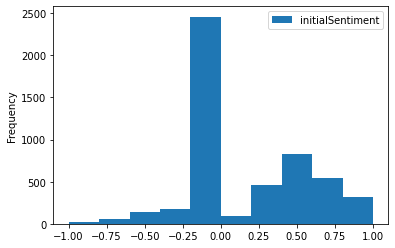

In [301]:
final_df3.plot(kind="hist", y="initialSentiment")#.loc[0, "content"]

<AxesSubplot:ylabel='Frequency'>

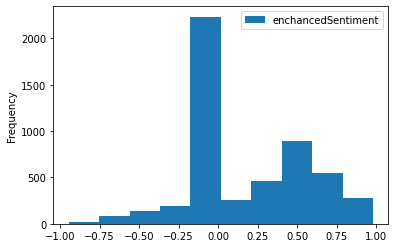

In [302]:
final_df3.plot(kind="hist", y="enchancedSentiment")

In [138]:
final_df3[final_df3.initialSentiment == 0.00].head(20)

,id,name,content,timestamp,Datetime,EasternDT,Hours,IsBot,initialSentiment,mentionedStocks,enchancedSentiment
9,702961272689524767,aalisub#9254,<@!579205396166737921> padding my stats,2020-11-30T15:16:18.906000+00:00,2020-11-30 15:16:18.906000+00:00,2020-11-30 10:16:18.906000-05:00,10.266667,0,0.0,,0.0000
16,354021275229749249,bigbag6927#0588,<@703659646279483503> <@!579205396166737921> 💯🤞🏾,2020-11-27T20:07:34.307000+00:00,2020-11-27 20:07:34.307000+00:00,2020-11-27 15:07:34.307000-05:00,15.116667,0,0.0,,0.5707
18,452988914215550997,OptionsFamBot#9520,`Error in command 'chart_d'. Check your consol...,2020-11-27T17:43:25.925000+00:00,2020-11-27 17:43:25.925000+00:00,2020-11-27 12:43:25.925000-05:00,12.716667,0,0.0,,0.0000
19,456926303640223775,mathdebater#6440,!cd beke,2020-11-27T17:43:22.926000+00:00,2020-11-27 17:43:22.926000+00:00,2020-11-27 12:43:22.926000-05:00,12.716667,0,0.0,beke,0.0000
21,223634339106127876,Lecrit#3469,<@!300836254457659392>,2020-11-27T17:31:01.145000+00:00,2020-11-27 17:31:01.145000+00:00,2020-11-27 12:31:01.145000-05:00,12.516667,0,0.0,,0.0000
25,269575947823349761,wetlqd#7618,This is the new position 1 hr into trading. 👇🏼,2020-11-27T15:05:46.711000+00:00,2020-11-27 15:05:46.711000+00:00,2020-11-27 10:05:46.711000-05:00,10.083333,0,0.0,,0.2023
26,269575947823349761,wetlqd#7618,So this was rolled on Nov 25 mid session. 👇🏼,2020-11-27T15:05:28.907000+00:00,2020-11-27 15:05:28.907000+00:00,2020-11-27 10:05:28.907000-05:00,10.083333,0,0.0,mid,0.2023
27,208746586233241600,Alpha190#0698,PLTR call came in clutch,2020-11-26T04:50:30.495000+00:00,2020-11-26 04:50:30.495000+00:00,2020-11-25 23:50:30.495000-05:00,23.833333,0,0.0,pltr,0.0000
28,629362548919107584,ningning#8888,Lego,2020-11-25T22:26:02.140000+00:00,2020-11-25 22:26:02.140000+00:00,2020-11-25 17:26:02.140000-05:00,17.433333,0,0.0,,0.0000
30,119546878445486081,Eyesoul#5306,Fucking ningning 😭👍🏾,2020-11-25T19:00:46.647000+00:00,2020-11-25 19:00:46.647000+00:00,2020-11-25 14:00:46.647000-05:00,14.000000,0,0.0,,0.1494


In [281]:
lex_dict_discord = {}
for sentences in final_df3.content.values:
    sents = sent_tokenize(sentences)
    for sen in sents:
        words = word_tokenize(sen)
        for word in words:
            word = word.lower()
            elist = emoji.emoji_lis(word)
            if elist != []:
                next
            else:
                if (word in stop_words) or (word in string.punctuation) or (str.isnumeric(word)):
                    next
                else:
                    if word not in lex_dict_discord.keys():
                        lex_dict_discord[word] = 1
                    else:
                        lex_dict_discord[word] += 1

In [282]:
ldd_sorted = dict(sorted(lex_dict_discord.items(), key=lambda item: item[1]))

In [283]:
list(ldd_sorted.keys())[-100:]

['job',
 'love',
 'baby',
 'paid',
 'since',
 'start',
 'days',
 'couple',
 'much',
 'options',
 'signal',
 'well',
 'trademate',
 'percent',
 'guys',
 'tomorrow',
 'right',
 'bynd',
 'earnings',
 'challenge',
 'sell',
 'keep',
 'market',
 'way',
 'would',
 'big',
 'amd',
 'plays',
 'work',
 'chat',
 'going',
 'gang',
 'free',
 'bought',
 '...',
 'contracts',
 'green',
 'let',
 'trades',
 'lol',
 'cut',
 'morning',
 "n't",
 'first',
 'make',
 'another',
 'half',
 'tsla',
 'little',
 'yesterday',
 'took',
 'see',
 'go',
 'put',
 'gain',
 'man',
 'made',
 "'s",
 'back',
 'everyone',
 'thank',
 'trading',
 'holding',
 'great',
 'small',
 'puts',
 'time',
 'trimming',
 'swing',
 'like',
 'take',
 'account',
 'scalp',
 'reached',
 'get',
 'play',
 'trim',
 'week',
 'last',
 'calls',
 'level',
 'spy',
 'still',
 'call',
 'money',
 'nice',
 'profits',
 'gains',
 'got',
 'good',
 'quick',
 'trimmed',
 'trade',
 'profit',
 'sold',
 'one',
 'today',
 'thanks',
 'day',
 '’']

In [303]:
final_df3.head()

,id,name,content,timestamp,Datetime,EasternDT,Hours,IsBot,initialSentiment,mentionedStocks,enchancedSentiment
0,488359813160501251,Merente#5844,Thanks <@464449226521313292> ! I opted for th...,2020-11-30T20:48:43.035000+00:00,2020-11-30 20:48:43.035000+00:00,2020-11-30 15:48:43.035000-05:00,15.800000,0,0.7946,,0.4650
1,689681229989150742,jackaplan#7289,Barely followed the market at all today (didn’...,2020-11-30T20:58:32.872000+00:00,2020-11-30 20:58:32.872000+00:00,2020-11-30 15:58:32.872000-05:00,15.966667,0,0.1901,,0.1901
2,612337363326074936,Trademate#2515,<@131952052069728258> has reached level **13**!,2020-11-30T19:55:20.913000+00:00,2020-11-30 19:55:20.913000+00:00,2020-11-30 14:55:20.913000-05:00,14.916667,1,0.3365,,0.1759
3,131952052069728258,Teecee#3022,<@!464449226521313292> thanks boss,2020-11-30T19:55:20.625000+00:00,2020-11-30 19:55:20.625000+00:00,2020-11-30 14:55:20.625000-05:00,14.916667,0,0.4926,,0.4926
4,464449226521313292,TradingJEDI#2647,<@!399198468159045633> BRO AWSOME SO GLAD YOU ...,2020-11-30T19:44:26.516000+00:00,2020-11-30 19:44:26.516000+00:00,2020-11-30 14:44:26.516000-05:00,14.733333,0,0.7228,,0.7228


<h1 style="color: purple">Tuesday's Code</h1>
<h4 style="color: purple">To Dos</h4>
<ol style="color: purple">
    <li>Read in New Comments</li>
    <li>Process them with dt.fromiso, easternize, timeofday, isBot</li>
    <li>Process with initialScores, FindCompanies to get ticker info and CommentFactory for unhandled emotes</li>
    <li>Cleaned Dataframes should look like <b>{final_df_3}</b></li>
    <li>Once I have the new list I can start on:</li>
    <li>Make News API func</li>
    <li>Automate Article Scraper</li>
</ol>

In [142]:
new_tables_dicord = {"text2": ['text_588270137874841620_588284257491877889',
'text_588270137874841620_619993945635553300'],
 "text3": ['text_739974491664285819_759599005889331231']
}

In [166]:
conn2 = sqlite3.connect("../data/raw/text2.db")

In [144]:
#comments_df2 = pd.read_sql("SELECT * FROM text_588270137874841620_588284257491877889", con=conn2)

In [167]:
comments_df2 = pd.read_sql("SELECT * FROM text_588270137874841620_619993945635553300", con=conn2)

In [168]:
conn2.close()

In [169]:
conn3 = sqlite3.connect("../data/raw/text3.db")

In [170]:
comments_df3 = pd.read_sql("SELECT * FROM text_739974491664285819_759599005889331231", con=conn3)

In [171]:
conn3.close()

In [172]:
comments_df3["channel"] = "C"
comments_df2["channel"] = "B"

In [173]:
new_comments_dc = pd.concat([comments_df2, comments_df3], axis=0, ignore_index=True)

In [174]:
final_df3.columns

Index(['id', 'name', 'content', 'timestamp', 'Datetime', 'EasternDT', 'Hours',
       'IsBot', 'initialSentiment', 'mentionedStocks', 'enchancedSentiment'],
      dtype='object')

In [175]:
new_comments_dc=new_comments_dc.assign(Datetime = lambda x: x.timestamp.apply(datetime.datetime.fromisoformat))
new_comments_dc=new_comments_dc.assign(EasternDT = lambda x: x.Datetime.apply(easternize))
new_comments_dc=new_comments_dc.assign(Hours = lambda x: x.EasternDT.apply(timeofday))
new_comments_dc=new_comments_dc.assign(IsBot = lambda x: x.content.apply(catchBot))

In [181]:
new_comments_dc = new_comments_dc.drop_duplicates()

In [183]:
new_comments_dc = new_comments_dc[new_comments_dc.IsBot == 0].reset_index(drop=True)

In [133]:
new_comments_dc=new_comments_dc.assign(initialSentiment = lambda x: x.content.apply(initialPolarity))

In [187]:
new_discord_emotes = {}
for val in new_comments_dc.content.values:
    used_emotes = emoji.emoji_lis(val)
    if used_emotes == []:
        next
    else:
        for emote in used_emotes:
            if emote["emoji"] not in new_discord_emotes.keys():
                new_discord_emotes[emote["emoji"]] = 1
            else:
                new_discord_emotes[emote["emoji"]] += 1

In [199]:
newEmotesD = {}
for x in new_discord_emotes.keys():
    ename = expansive_emoji_dict[x]
    ename = ename.replace(":", "")
    if "_" not in ename:
        ename = "_" + ename
    if ename in lexicon.keys():
        next
        #newEmotesD[x] = lexicon[ename]
    else:
        newEmotesD[x] = ename

In [200]:
newEmotesD

{'🦃': '_turkey',
 '🏽': 'medium_skin_tone',
 '🤪': 'zany_face',
 '🏻': 'light_skin_tone',
 '🍾': 'bottle_with_popping_cork',
 '🏼': 'medium_light_skin_tone',
 '🚸': 'children_crossing',
 '🤮': 'face_vomiting',
 '👌': 'OK_hand',
 '🤚': 'raised_back_of_hand',
 '👁': '_eye',
 '🙄': 'face_with_rolling_eyes',
 '🧺': '_basket',
 '🖨': '_printer',
 '🤡': 'clown_face',
 '\U0001f7e5': 'red_square',
 '🏾': 'medium_dark_skin_tone',
 '🤓': 'nerd_face',
 '🥵': 'hot_face',
 '🤨': 'face_with_raised_eyebrow',
 '🧢': 'billed_cap',
 '🤭': 'face_with_hand_over_mouth'}

In [209]:
newEmotesDV = newEmotesD

In [210]:
additional_emotes_dictionary = {}
for k,v in newEmotesDV.items():
    additional_emotes_dictionary[v] = k 

In [248]:
additional_emotes_dictionary["_turkey"] = 0.7
additional_emotes_dictionary['zany_face'] = 0.2
additional_emotes_dictionary['bottle_with_popping_cork'] = 1.2
additional_emotes_dictionary['children_crossing'] = -0.9
additional_emotes_dictionary['face_vomiting'] =-1.8
additional_emotes_dictionary['OK_hand'] = 1.2
additional_emotes_dictionary['raised_back_of_hand'] = -0.8
additional_emotes_dictionary['_eye'] = 0.2
additional_emotes_dictionary['face_with_rolling_eyes'] = -1.1
additional_emotes_dictionary['_basket'] = 0.1
additional_emotes_dictionary['_printer'] = 2.2
additional_emotes_dictionary['red_square'] = -.1
additional_emotes_dictionary['nerd_face'] = 0.6
additional_emotes_dictionary['hot_face'] = -1.4
additional_emotes_dictionary['face_with_raised_eyebrow'] = 0.0
additional_emotes_dictionary['billed_cap'] = 1.3
additional_emotes_dictionary['face_with_hand_over_mouth'] = 1.6
additional_emotes_dictionary['clown_face'] = -1.9

In [256]:
additional_emotes_dictionary.pop('medium_dark_skin_tone')

'🏾'

In [257]:
additional_emotes_dictionary

{'_turkey': 0.7,
 'zany_face': 0.2,
 'bottle_with_popping_cork': 1.2,
 'children_crossing': -0.9,
 'face_vomiting': -1.8,
 'OK_hand': 1.2,
 'raised_back_of_hand': -0.8,
 '_eye': 0.2,
 'face_with_rolling_eyes': -1.1,
 '_basket': 0.1,
 '_printer': 2.2,
 'clown_face': -1.9,
 'red_square': -0.1,
 'nerd_face': 0.6,
 'hot_face': -1.4,
 'face_with_raised_eyebrow': 0.0,
 'billed_cap': 1.3,
 'face_with_hand_over_mouth': 1.6}

In [258]:
lexicon.update(additional_emotes_dictionary)

In [259]:
new_comments_dc = new_comments_dc.assign(initialSentiment = lambda x: x.content.apply(initialPolarity))

<AxesSubplot:ylabel='Frequency'>

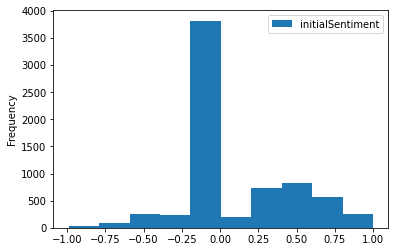

In [261]:
new_comments_dc.plot(kind="hist", y="initialSentiment")

In [288]:
new_comments_dc = new_comments_dc.assign(mentionedStocks = lambda x: x.content.apply(findCompanies))

In [265]:
new_comments_dc= new_comments_dc.assign(enchancedSentiment = lambda x: x.content.apply(commentFactory))

<AxesSubplot:ylabel='Frequency'>

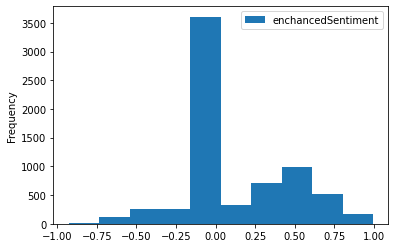

In [266]:
new_comments_dc.plot(kind="hist", y="enchancedSentiment")

In [289]:
caught_mentions4 = new_comments_dc.mentionedStocks.values
mentions = {}
for cm in caught_mentions4:
    if "," in cm:
        words = cm.split(",")
        for word in words:
            word = word.strip()
            if word not in mentions.keys():
                mentions[word] = 1
            else:
                mentions[word] += 1
    elif cm != "":
        cm = cm.strip()
        if cm not in mentions.keys():
            mentions[cm] = 1
        else:
            mentions[cm] += 1
    else:
        next
ment_sort3 = dict(sorted(mentions.items(), key=lambda item: item[1]))

In [290]:
ment_sort3

{'unit': 1,
 'cyrx': 1,
 'nbac': 1,
 'apxt': 1,
 'sndl': 1,
 'aout': 1,
 'beke': 1,
 'zs': 1,
 'okta': 1,
 'lthm': 1,
 'wrap': 1,
 'myt': 1,
 'nnn': 1,
 'ig': 1,
 'fcel': 1,
 'dada': 1,
 'tlsa': 1,
 'admp': 1,
 'nndm': 1,
 'lly': 1,
 'jks': 1,
 'uaa': 1,
 'tv': 1,
 'root': 1,
 'ko': 1,
 'lmt': 1,
 'unh': 1,
 'feye': 1,
 'econ': 1,
 'tot': 1,
 'gim': 1,
 'slvo': 1,
 'gldi': 1,
 'ach': 1,
 'land': 1,
 'rmg': 1,
 'jd': 1,
 'xle': 1,
 'icon': 1,
 'exas': 1,
 'pace': 1,
 'hii': 1,
 'sc': 1,
 'ulta': 1,
 'sbux': 1,
 'rev': 1,
 'age': 1,
 'lca': 1,
 'dual': 1,
 'fan': 1,
 'dar': 1,
 'webs': 1,
 'ide': 1,
 'tat': 1,
 'thr': 1,
 'bar': 1,
 'uso': 1,
 'tree': 1,
 'bio': 1,
 'ring': 1,
 'corp': 1,
 'cog': 1,
 'cia': 1,
 'et': 1,
 'al': 1,
 'wkey': 1,
 'hero': 1,
 'wil': 1,
 'tok': 1,
 'flir': 1,
 'e': 1,
 'ogi': 1,
 'nvta': 1,
 'chgg': 1,
 'vive': 1,
 'edsa': 1,
 'kodk': 1,
 'vod': 1,
 'g': 1,
 'hlx': 1,
 'wdc': 1,
 'snde': 1,
 'ibkr': 1,
 'xspa': 1,
 'sam': 1,
 'unfi': 1,
 'ms': 1,
 'bto': 1,
 '

In [293]:
lex_dict_discord = {}
for sentences in new_comments_dc.content.values:
    sents = sent_tokenize(sentences)
    for sen in sents:
        words = word_tokenize(sen)
        for word in words:
            word = word.lower()
            elist = emoji.emoji_lis(word)
            if elist != []:
                next
            else:
                if (word in stop_words) or (word in string.punctuation) or (str.isnumeric(word)):
                    next
                else:
                    if word not in lex_dict_discord.keys():
                        lex_dict_discord[word] = 1
                    else:
                        lex_dict_discord[word] += 1

In [294]:
ldd_sorted3 = dict(sorted(lex_dict_discord.items(), key=lambda item: item[1]))

In [163]:
#new_comments_dc=new_comments_dc.assign(mentionedStocks = lambda x: x.content.apply(findCompanies))

In [135]:
#new_comments_dc.assign(enchancedSentiment = lambda x: x.content.apply(commentFactory))

In [315]:
final_df3.shape

(5081, 12)

In [311]:
new_comments_dc.shape

(6994, 12)

In [314]:
final_df3["channel"] = "A"

In [350]:
master_data_frame = pd.concat([final_df3, new_comments_dc], axis=0, ignore_index=True)

In [351]:
master_data_frame = master_data_frame[master_data_frame.IsBot == 0]

In [352]:
# Ticker Info
caught_mentions44 = master_data_frame.mentionedStocks.values
mentions44 = {}
for cm in caught_mentions44:
    if "," in cm:
        words = cm.split(",")
        for word in words:
            word = word.strip()
            if word not in mentions44.keys():
                mentions44[word] = 1
            else:
                mentions44[word] += 1
    elif cm != "":
        cm = cm.strip()
        if cm not in mentions44.keys():
            mentions44[cm] = 1
        else:
            mentions44[cm] += 1
    else:
        next
ment_sort_final_44 = dict(sorted(mentions44.items(), key=lambda item: item[1]))

In [353]:
# Words from text.db - text3.db
lex_dict_discord_final = {}
for sentences in master_data_frame.content.values:
    sents = sent_tokenize(sentences)
    for sen in sents:
        words = word_tokenize(sen)
        for word in words:
            word = word.lower()
            elist = emoji.emoji_lis(word)
            if elist != []:
                next
            else:
                if (word in stop_words) or (word in string.punctuation) or (str.isnumeric(word)):
                    next
                else:
                    if word not in lex_dict_discord_final.keys():
                        lex_dict_discord_final[word] = 1
                    else:
                        lex_dict_discord_final[word] += 1

In [ ]:
ment_sort_final_44 # tickers
lex_dict_discord_final # words 

In [340]:
def channelName(chan):
    if chan == "A":
        return "Profits"
    elif chan == "B":
        return "Losses & Learning"
    else:
        return "Trading Floor"

In [345]:
def servername(c):
    if c == "Trading Floor":
        return "Legacy Trading"
    else:
        return "Trademates"

In [355]:
master_data_frame= master_data_frame.assign(channel_x = lambda x: x.channel.apply(channelName))

In [356]:
master_data_frame = master_data_frame.assign(server = lambda x: x.channel_x.apply(servername))

In [358]:
master_data_frame=master_data_frame.drop(columns=["channel"])

In [363]:
master_data_frame = master_data_frame.rename(columns={"channel_x": "channel"})

In [364]:
master_data_frame

,id,name,content,timestamp,Datetime,EasternDT,Hours,IsBot,initialSentiment,mentionedStocks,enchancedSentiment,channel,server
0,488359813160501251,Merente#5844,Thanks <@464449226521313292> ! I opted for th...,2020-11-30T20:48:43.035000+00:00,2020-11-30 20:48:43.035000+00:00,2020-11-30 15:48:43.035000-05:00,15.800000,0,0.7946,,0.4650,Profits,Trademates
1,689681229989150742,jackaplan#7289,Barely followed the market at all today (didn’...,2020-11-30T20:58:32.872000+00:00,2020-11-30 20:58:32.872000+00:00,2020-11-30 15:58:32.872000-05:00,15.966667,0,0.1901,,0.1901,Profits,Trademates
3,131952052069728258,Teecee#3022,<@!464449226521313292> thanks boss,2020-11-30T19:55:20.625000+00:00,2020-11-30 19:55:20.625000+00:00,2020-11-30 14:55:20.625000-05:00,14.916667,0,0.4926,,0.4926,Profits,Trademates
4,464449226521313292,TradingJEDI#2647,<@!399198468159045633> BRO AWSOME SO GLAD YOU ...,2020-11-30T19:44:26.516000+00:00,2020-11-30 19:44:26.516000+00:00,2020-11-30 14:44:26.516000-05:00,14.733333,0,0.7228,,0.7228,Profits,Trademates
5,399198468159045633,AjKilgore#0424,<@!464449226521313292> might have sold a bit ...,2020-11-30T19:30:11.004000+00:00,2020-11-30 19:30:11.004000+00:00,2020-11-30 14:30:11.004000-05:00,14.500000,0,0.8398,,0.8398,Profits,Trademates
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12070,700394878462328832,Jaime#0289,Lmaooo the swing emoji,2020-09-27T03:32:23.928000+00:00,2020-09-27 03:32:23.928000+00:00,2020-09-26 22:32:23.928000-05:00,22.533333,0,0.0000,,0.0000,Trading Floor,Legacy Trading
12071,249322341715279872,Angros#1994,haha,2020-09-27T03:30:57.455000+00:00,2020-09-27 03:30:57.455000+00:00,2020-09-26 22:30:57.455000-05:00,22.500000,0,0.4588,,0.4588,Trading Floor,Legacy Trading
12072,737081860554752121,Colton(Options)#9047,Haha I get tired of the same one,2020-09-27T03:30:52.587000+00:00,2020-09-27 03:30:52.587000+00:00,2020-09-26 22:30:52.587000-05:00,22.500000,0,0.0258,,0.0258,Trading Floor,Legacy Trading
12073,249322341715279872,Angros#1994,> Pleasing to the eye :))\n<@!7370818605547521...,2020-09-27T03:30:37.880000+00:00,2020-09-27 03:30:37.880000+00:00,2020-09-26 22:30:37.880000-05:00,22.500000,0,0.6103,eye,0.6103,Trading Floor,Legacy Trading


In [368]:
master_data_frame.columns

Index(['id', 'name', 'content', 'timestamp', 'Datetime', 'EasternDT', 'Hours',
       'IsBot', 'initialSentiment', 'mentionedStocks', 'enchancedSentiment',
       'channel', 'server'],
      dtype='object')

In [365]:
connection = sqlite3.connect("../data/processed/discord.db")

In [366]:
master_data_frame.to_sql("DiscordText3", con=connection)

In [367]:
connection.close()

In [ ]:
new_data_stores = {"Legacy Trading": {"general": 'text_739974491664285819_759576912305192960',
                                     "profits": "text_739974491664285819_765441587962445826",
                                     "text": " text_588270137874841620_664175778052964382"},
                  "Omega Trades": {"general": "text_712383189154267208_737034697468805263",
                                  "winning": "text_712383189154267208_712443376737320971",
                                  "tech": "text_712383189154267208_779828292748181584",
                                  "sentiment": "text_712383189154267208_712443212224266282",
                                  "text": ["text_712383189154267208_738892580254646464",  'text_712383189154267208_719551934788534333'],
                                  "potential_dupe": "text_712383189154267208_719551934788534333"},
                  "Misc": {"text2": "text_712383189154267208_712443376737320971",
                          "text": ["text_712383189154267208_719551934788534333", " text_712383189154267208_779828292748181584"]}}

In [370]:
!git add .

In [372]:
!git commit -m "processed Trademates and main Legacy channel"

[main 594c739] processed Trademates and main Legacy channel
 1 file changed, 502 insertions(+), 3 deletions(-)


In [394]:
tree = os.walk("../data/raw")

In [395]:
for folders, subfolders, files in tree:
    print(folders)
    print('--')
    print(subfolders)
    print('----')
    print(files)
    print("\n")
    

../data/raw
--
['BullTrades.net', 'Learn-n', 'Legacy Trading', 'LSV', 'Misc', 'OmegaTrades', 'Pennybois', 'Phantom Trades', 'Templar Trading', 'WayTrade']
----
['.gitkeep', 'intrinsicValueCalculator.xlsx', 'text2.db', 'text3.db']


../data/raw\BullTrades.net
--
[]
----
['options-chat.db', 'stocks-chat.db']


../data/raw\Learn-n
--
[]
----
['trade-chat.db']


../data/raw\Legacy Trading
--
[]
----
['general.db', 'profits.db', 'text.db', 'trading-discussion.db']


../data/raw\LSV
--
[]
----
['options.db', 'trading.db']


../data/raw\Misc
--
[]
----
['stock-chat.db', 'text.db', 'text2.db', 'text3.db', 'text4.db', 'text5.db', 'text6.db', 'trade-ideas.db', 'wetlqd-ideas.db']


../data/raw\OmegaTrades
--
[]
----
['general.db', 'potentialdupe.db', 'sentiment.db', 'tech.db', 'text.db', 'winning.db']


../data/raw\Pennybois
--
[]
----
['stock-check.db']


../data/raw\Phantom Trades
--
[]
----
['lt-investing.db', 'trading-floor.db']


../data/raw\Templar Trading
--
[]
----
['day-trading.db', 'mai

In [443]:
def getalldata(folder):
    master_df = pd.DataFrame(columns=["id", "name", "content", "timestamp"])
    tree = os.walk(folder)
    for folders, subfolder, files in tree:
        if folders == "../data/raw":
            next
        else:
            
            for file in files: # get database file
                #print(folders)
                print("\n")
                connection_str = folders.replace("\\", "/") +"/" + file #setup connection string
                conek = sqlite3.connect(connection_str)
                mycur = conek.cursor()
                mycur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name") #get available tables
                available_tables = mycur.fetchall()
                server_name = folders.replace("../data/raw\\", "") #server name to append to df
                
                channel_name = file.replace(".db", "") # channel name to append to df
                
                for i, tbl in enumerate(available_tables):
                    df = pd.read_sql(f"SELECT * FROM {tbl[0]}", con=conek)
                    df["channel"] = channel_name
                    df["server"] = server_name
                    master_df = pd.concat([master_df, df], axis=0, ignore_index=True)
                conek.close()
                print(f"processed {channel_name}. Beep Bop Boop.....")
    return master_df

In [444]:
monster_df = getalldata("../data/raw")



processed options-chat. Beep Bop Boop.....


processed stocks-chat. Beep Bop Boop.....


processed trade-chat. Beep Bop Boop.....


processed general. Beep Bop Boop.....


processed profits. Beep Bop Boop.....


processed text. Beep Bop Boop.....


processed trading-discussion. Beep Bop Boop.....


processed options. Beep Bop Boop.....


processed trading. Beep Bop Boop.....


processed stock-chat. Beep Bop Boop.....


processed text. Beep Bop Boop.....


processed text2. Beep Bop Boop.....


processed text3. Beep Bop Boop.....


processed text4. Beep Bop Boop.....


processed text5. Beep Bop Boop.....


processed text6. Beep Bop Boop.....


processed trade-ideas. Beep Bop Boop.....


processed wetlqd-ideas. Beep Bop Boop.....


processed general. Beep Bop Boop.....


processed potentialdupe. Beep Bop Boop.....


processed sentiment. Beep Bop Boop.....


processed tech. Beep Bop Boop.....


processed text. Beep Bop Boop.....


processed winning. Beep Bop Boop.....


processed stock-c

In [445]:
monster_df.shape

(214870, 6)

In [449]:
monster_df = monster_df.drop_duplicates()

In [452]:
monster_df = monster_df.reset_index(drop=True)

In [451]:
master_data_frame.columns

Index(['id', 'name', 'content', 'timestamp', 'Datetime', 'EasternDT', 'Hours',
       'IsBot', 'initialSentiment', 'mentionedStocks', 'enchancedSentiment',
       'channel', 'server'],
      dtype='object')

In [453]:
monster_df.head()

,id,name,content,timestamp,channel,server
0,711654777259294794,JPow#2514,AAPL doesn't wan to give us 125 yet lmao,2020-12-08T20:01:46.760000+00:00,options-chat,BullTrades.net
1,682377655907254312,NoObGamer.618#3399,tomorrow 5,2020-12-08T20:01:46.829000+00:00,options-chat,BullTrades.net
2,738259128631427142,Sam94 buying dip#7202,I WANT TO BUY AROUND 634,2020-12-08T20:01:48.927000+00:00,options-chat,BullTrades.net
3,704074357135114302,MMs hate me#2020,Was b****in about amzn all day and then sold a...,2020-12-08T20:01:34.900000+00:00,options-chat,BullTrades.net
4,709787787955535912,mov#1337,Gosh PDD 😍,2020-12-08T20:00:48.117000+00:00,options-chat,BullTrades.net


In [454]:
monster_df=monster_df.assign(Datetime = lambda x: x.timestamp.apply(datetime.datetime.fromisoformat))
monster_df=monster_df.assign(EasternDT = lambda x: x.Datetime.apply(easternize))
monster_df=monster_df.assign(Hours = lambda x: x.EasternDT.apply(timeofday))
monster_df=monster_df.assign(IsBot = lambda x: x.content.apply(catchBot))

In [458]:
monster_df = monster_df[monster_df.IsBot == 0]

In [459]:
monster_df = monster_df.reset_index(drop=True)

In [476]:
new_discord_emotes3 = {}
for val in monster_df.content.values:
    used_emotes = emoji.emoji_lis(val)
    if used_emotes == []:
        next
    else:
        for emote in used_emotes:
            if emote["emoji"] not in new_discord_emotes3.keys():
                new_discord_emotes3[emote["emoji"]] = 1
            else:
                new_discord_emotes3[emote["emoji"]] += 1

notation = {}
newEmotesDDD = {}
for x in new_discord_emotes3.keys():
    ename = expansive_emoji_dict[x]
    ename = ename.replace(":", "")
    if "_" not in ename:
        ename = "_" + ename
    if ename in lexicon.keys():
        next
        #newEmotesD[x] = lexicon[ename]
    else:
        if x in emosent_emoj_dict.keys():
            notation[ename] = "x"
        notation[ename] = new_discord_emotes3[x]
        newEmotesDDD[x] = ename

In [502]:
eel =  ['\U0001fa91', '🛌', '🕺', '🌎', '🙁', '🥃', '⚰', '\U0001f971', '🦈', '🖖', '📽']
for com in monster_df.content.values:
    if eel[10] in com:
        print(com)

<@250629554115313664> and I gonna go grab Grandma's Boy from BB📽️🎥


In [503]:
emosent_emoj_dict["🎥"]

{'score': 1.0, 'lexname': 'movie_camera'}

In [505]:
notation['UP!_button'] = 1.1
notation['drop_of_blood'] = -0.8
notation['_link'] = 0.0
notation['upside-down_face']: -0.7
notation['speaking_head'] = 0.2
notation['woozy_face'] = -1.4
notation['pinching_hand'] = 0.5
notation['_desert'] = 0.0
notation['green_circle'] = 1.4
notation['derelict_house'] = 0.0
notation['_deer'] = 0.1
notation['clinking_glasses'] = 0.6
notation['trade_mark'] = 0
notation['cold_face'] = -1.2
notation['middle_finger'] = -0.9
notation['person_in_bed'] = 0.0
notation['man_dancing'] = 0.5
notation['globe_showing_Americas'] = 0.4
notation['slightly_frowning_face'] = -0.5
notation['tumbler_glass'] = 1.2
notation['_coffin'] = 0.3
notation['yawning_face'] = -0.2
notation['_shark'] = 0.4
notation['vulcan_salute'] = 0.2
notation['film_projector'] = 1.0

In [523]:
notation2 = {}
for s in notation.keys():
    notation2[s.lower()] = notation[s]

In [525]:
lexicon.update(notation2)

In [284]:
ment_sort # first server's mentions

{'beke': 1,
 'clsk': 1,
 'cold': 1,
 'pdd': 1,
 'sino': 1,
 'lyft': 1,
 'uve': 1,
 'snow': 1,
 'vc': 1,
 'jblu': 1,
 'tmo': 1,
 'gem': 1,
 'asln': 1,
 'sgbx': 1,
 'thr': 1,
 'hyln': 1,
 'se': 1,
 'nke': 1,
 'iwn': 1,
 'ibb': 1,
 'ddog': 1,
 'nee': 1,
 'jamf': 1,
 'uk': 1,
 'pace': 1,
 'sum': 1,
 'five': 1,
 'vz': 1,
 'penn': 1,
 'mt': 1,
 'wifi': 1,
 'tlry': 1,
 'jmia': 1,
 'glw': 1,
 'imo': 1,
 'gs': 1,
 'ncno': 1,
 'ev': 1,
 'goog': 1,
 'ads': 1,
 'jp': 1,
 'ino': 1,
 'jwn': 1,
 'uonek': 1,
 'docu': 1,
 'ivr': 1,
 'mgm': 1,
 'mom': 1,
 'rtx': 1,
 'meli': 1,
 'salt': 1,
 'rcl': 1,
 'upro': 1,
 'opp': 1,
 'stor': 1,
 'bj': 1,
 'ni': 1,
 'xlk': 1,
 'prty': 1,
 'dri': 1,
 'wmt': 1,
 'gld': 1,
 'kmb': 1,
 'lvs': 1,
 'solo': 1,
 'xspa': 1,
 'lit': 1,
 'sfix': 1,
 'googl': 1,
 'form': 1,
 'must': 1,
 'csco': 1,
 'hyg': 1,
 'nail': 1,
 'mrk': 1,
 'vice': 1,
 'fan': 1,
 'plnt': 1,
 'dow': 1,
 'bw': 1,
 'siri': 1,
 'spi': 1,
 'ofc': 1,
 'sub': 1,
 'de': 1,
 'six': 1,
 'mos': 1,
 'aig': 1,
 'he

In [285]:
ldd_sorted # tokens and their users dict {chatroom 1}

{'opted': 1,
 'awsome': 1,
 'fantastic': 1,
 'padding': 1,
 'stats': 1,
 'servers': 1,
 '**17**': 1,
 'error': 1,
 'command': 1,
 "'chart_d": 1,
 'console': 1,
 'logs': 1,
 'details.': 1,
 'cd': 1,
 'beke': 1,
 '3.7': 1,
 'hr': 1,
 'session': 1,
 'lego': 1,
 'ningning': 1,
 'gaiiiinssss': 1,
 'blown': 1,
 'recover': 1,
 '12/4': 1,
 'ira': 1,
 'crushing': 1,
 'bottom': 1,
 'dec': 1,
 'clsk': 1,
 'whipping': 1,
 'atlanta': 1,
 'poggers': 1,
 '//cdn.discordapp.com/attachments/496728337985699850/780442225015652412/screenshot_20201123-093506_robinhood.jpg': 1,
 'survived': 1,
 'unlocked': 1,
 'sweating_mario:546615219632472064': 1,
 'ittttt': 1,
 '15.65': 1,
 '16.95': 1,
 '8.3': 1,
 'cold': 1,
 'quote': 1,
 'idiot': 1,
 '+12': 1,
 'nsx': 1,
 'program': 1,
 '1.62': 1,
 'russell': 1,
 'fish': 1,
 'judge': 1,
 'separate': 1,
 'healthy': 1,
 'clinched': 1,
 'unloaded': 1,
 'diamonds': 1,
 'pdd': 1,
 '+26': 1,
 'opportunistic': 1,
 '11/10': 1,
 'multiples': 1,
 'sino': 1,
 '2.13': 1,
 'blip': 1,

In [292]:
ment_sort3 ### chatroom2-3 stock mentions

{'unit': 1,
 'cyrx': 1,
 'nbac': 1,
 'apxt': 1,
 'sndl': 1,
 'aout': 1,
 'beke': 1,
 'zs': 1,
 'okta': 1,
 'lthm': 1,
 'wrap': 1,
 'myt': 1,
 'nnn': 1,
 'ig': 1,
 'fcel': 1,
 'dada': 1,
 'tlsa': 1,
 'admp': 1,
 'nndm': 1,
 'lly': 1,
 'jks': 1,
 'uaa': 1,
 'tv': 1,
 'root': 1,
 'ko': 1,
 'lmt': 1,
 'unh': 1,
 'feye': 1,
 'econ': 1,
 'tot': 1,
 'gim': 1,
 'slvo': 1,
 'gldi': 1,
 'ach': 1,
 'land': 1,
 'rmg': 1,
 'jd': 1,
 'xle': 1,
 'icon': 1,
 'exas': 1,
 'pace': 1,
 'hii': 1,
 'sc': 1,
 'ulta': 1,
 'sbux': 1,
 'rev': 1,
 'age': 1,
 'lca': 1,
 'dual': 1,
 'fan': 1,
 'dar': 1,
 'webs': 1,
 'ide': 1,
 'tat': 1,
 'thr': 1,
 'bar': 1,
 'uso': 1,
 'tree': 1,
 'bio': 1,
 'ring': 1,
 'corp': 1,
 'cog': 1,
 'cia': 1,
 'et': 1,
 'al': 1,
 'wkey': 1,
 'hero': 1,
 'wil': 1,
 'tok': 1,
 'flir': 1,
 'e': 1,
 'ogi': 1,
 'nvta': 1,
 'chgg': 1,
 'vive': 1,
 'edsa': 1,
 'kodk': 1,
 'vod': 1,
 'g': 1,
 'hlx': 1,
 'wdc': 1,
 'snde': 1,
 'ibkr': 1,
 'xspa': 1,
 'sam': 1,
 'unfi': 1,
 'ms': 1,
 'bto': 1,
 '

In [296]:
list(ldd_sorted3.keys())[-100:]

['big',
 'ah',
 'great',
 'mean',
 'us',
 "''",
 'trades',
 "'re",
 'tsla',
 'even',
 'take',
 'back',
 'sell',
 'cd',
 'next',
 'free',
 'signals',
 'use',
 'haha',
 'u',
 'account',
 'shares',
 'gon',
 'lot',
 'let',
 'start',
 'look',
 'spy',
 'nice',
 'member',
 "'ll",
 'need',
 'made',
 'sure',
 'premium',
 'im',
 'earnings',
 'call',
 'chat',
 'long',
 'na',
 'people',
 'stocks',
 '``',
 'calls',
 'tomorrow',
 'trademate',
 'play',
 '--',
 'make',
 'much',
 'looking',
 'also',
 'want',
 'new',
 'change',
 'well',
 'buy',
 'still',
 'could',
 'welcome',
 'money',
 'right',
 'anyone',
 'thanks',
 'reached',
 'everyone',
 'stock',
 'know',
 'trading',
 "'m",
 'yeah',
 'guys',
 'options',
 'go',
 'level',
 'week',
 'time',
 'trial',
 'one',
 '...',
 'got',
 'today',
 'going',
 'hey',
 'trade',
 'market',
 'price',
 'day',
 'think',
 'see',
 'lol',
 'would',
 "n't",
 'good',
 'get',
 'https',
 "'s",
 'like',
 '’']

# All of the Data

In [686]:
def initialPolarity(comment):
    pattern = "<[@#&0-9]*>"
    mentions = re.findall(pattern, comment)
    for m in mentions:
        comment = comment.replace(m, "")
    data_dict = sia.polarity_scores(comment)
    return data_dict["compound"]

In [660]:
def findCompanies(comment):
    # lowercase the comment 
    m_comment = comment.lower()
    # the Elon rule
    if "elon" in m_comment:
        m_comment = m_comment + " tsla"
    # remove all mentions
    pattern = "<.*>"
    mentions = re.findall(pattern, m_comment)
    if mentions != []:
        for m in mentions:
            m_comment = m_comment.replace(m, "")
    #remove all emojis
    emojiPattern = emoji.get_emoji_regexp()
    emojis = re.findall(emojiPattern, m_comment)
    if emojis != []:
        for emote in emojis:
            m_comment = m_comment.replace(emote, "")
    # remove all punctuations
    # m_comment.translate(str.maketrans('', '', string.punctuation))
    m_comment=m_comment.replace("\n", "")
    mentioned_companies = []
    sentences_given = sent_tokenize(m_comment)
    for sentence in sentences_given:
        sentence = sentence.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(sentence)
        for token in tokens:
            token = token.lower()
            if (token not in additional_stop_words) and (token not in stop_words) and (token in ticker_translater.keys()):
                mentioned_companies.append(token)
    return ", ".join(mc for mc in mentioned_companies)

In [683]:
def commentFactory(com):
    comment = com
    comment = comment.replace("\n", "")
    # handle mentions
    mention_pattern = "<[0-9!#&]*>"
    mentions = re.findall(mention_pattern, comment)
    if mentions != []: # replace mentions
        for m in mentions:
            comment = com.replace(m, "")
    emoji_list = emoji.emoji_lis(comment)
    # Handled Emotes: translate to their lexical representation
    if emoji_list != []:
        for emote in emoji_list:
            code = expansive_emoji_dict[emote["emoji"]]
            if ("skin_tone" in code) or ("regional_indicator_" in code):
                    next
            elif (":male_sign:" == code) or (":female_sign:" == code):
                    next
            code = code.replace(":", " ") # 'unstick' emotes
            code = code.lower()
            comment = comment.replace(emote["emoji"], code)
#             if code not in emote_codes.keys(): # deal with unhandled emote
#                 if "_" not in code:
#                     code = "_" + code # single word emoji
#                 comment = comment.remove(code, "")
#                 sia.polarity_scores(comment)[""]
    sentiment_dict = sia.polarity_scores(comment)
#     scores_l = [sentiment_dict["neg"], sentiment_dict["neu"], sentiment_dict["pos"],  sentiment_dict["compound"]]
#     return ", ".join([s for s in scores_l])
    return sentiment_dict["compound"]

In [542]:
monster_df.columns

Index(['id', 'name', 'content', 'timestamp', 'channel', 'server', 'Datetime',
       'EasternDT', 'Hours', 'IsBot'],
      dtype='object')

In [541]:
master_data_frame.columns

Index(['id', 'name', 'content', 'timestamp', 'Datetime', 'EasternDT', 'Hours',
       'IsBot', 'initialSentiment', 'mentionedStocks', 'enchancedSentiment',
       'channel', 'server'],
      dtype='object')

In [687]:
monster_df = monster_df.assign(initialSentiment = lambda x: x.content.apply(initialPolarity))

In [546]:
monster_df.assign(mentionedStocks = lambda x: x.content.apply(findCompanies))

(40286, 10)

In [662]:
monster_df = monster_df.assign(mentionedStocks = lambda x: x.content.apply(findCompanies))

In [659]:
monster_df=monster_df.drop(columns=["mentionedStocks"])

In [663]:
stonks = pd.concat([new_comments_dc.loc[:, "mentionedStocks"], monster_df.loc[:, "mentionedStocks"]], axis=0, ignore_index=True)

In [664]:
stonks

0           
1           
2           
3           
4        rkt
        ... 
47275       
47276       
47277       
47278       
47279       
Name: mentionedStocks, Length: 47280, dtype: object

In [666]:
caught_mentions5 = stonks.values
mentions5= {}
for cm in caught_mentions5:
    if "," in cm:
        words = cm.split(",")
        for word in words:
            word = word.strip()
            if word in additional_stop_words:
                next
                        
            if word not in mentions5.keys():
                mentions5[word] = 1
            else:
                mentions5[word] += 1
    elif cm != "":
        if cm in additional_stop_words:
            next
        
        cm = cm.strip()
        if cm not in mentions5.keys():
            mentions5[cm] = 1
        else:
            mentions5[cm] += 1
    else:
        next


In [667]:
ment_sort5 = dict(sorted(mentions5.items(), key=lambda item: item[1]))

In [668]:
len(ment_sort5.keys())

1382

In [677]:
given_companies = list(ment_sort5.keys())[-65:]

In [560]:
comcoms = monster_df.content.values

In [692]:
for com in comcoms:
    if " level " in com.lower():
        print(com)      

https://www.tradingview.com/x/5nCoCnEr/ IBM a low key beaten up stock with cheap options could be a hidden gem for rally back to $135 level after breaking out the covid trend line
If it gaps over that level in pre market, that's a different story. But if it doesn't, puts
JD next res may be 96 based on 1.618fib level and the bull flag pole
<@!750190805209186375> AMZN is one company that I can see being broken up as they are so diversified and they are a prime target for uncompetitive practices. They already getting on the level of UPS in terms of deliveries of packages. https://twitter.com/corry_wang/status/1315035470703792130?s=20
You think this could change the level of playing field tomorrow at open,
Important fib level there
Also, the 330ish level is essential. If it bounces there, the inverse HS will play out. If it breaks through and doesn't really bounce, then the shorter timeframe HS will probably play out.
<@!758030851366846546> i do agree with you. it does have a strong suppor

In [597]:
"pro" in additional_stop_words

True

In [608]:
import time

In [679]:
master_data_frame.columns

Index(['id', 'name', 'content', 'timestamp', 'Datetime', 'EasternDT', 'Hours',
       'IsBot', 'initialSentiment', 'mentionedStocks', 'enchancedSentiment',
       'channel', 'server'],
      dtype='object')

In [684]:
monster_df = monster_df.assign(enchancedSentiment = lambda x: x.content.apply(commentFactory))

In [681]:
given_companies.reverse()

In [682]:
given_companies

['spy',
 'tsla',
 'amd',
 'nio',
 'aapl',
 'baba',
 'pltr',
 'tech',
 'ba',
 'bynd',
 'dkng',
 'fb',
 'roku',
 'zm',
 'es',
 'nvda',
 'pt',
 'sp',
 'pfe',
 'amzn',
 'acb',
 'sq',
 'msft',
 'fsly',
 'ipo',
 'pton',
 'snap',
 'wkhs',
 'cost',
 'hear',
 'nkla',
 'plug',
 'exas',
 'idex',
 'nflx',
 'pins',
 'rkt',
 'intc',
 'vxx',
 'shop',
 'dis',
 'pro',
 'sqqq',
 'gnus',
 'oil',
 'hyln',
 'blue',
 'spce',
 'jks',
 'crm',
 'gme',
 'sndl',
 'bill',
 'v',
 'qqq',
 'ko',
 'wwr',
 'spot',
 'ups',
 'apps',
 'crsr',
 'usd',
 'fund',
 'nndm',
 'net']

In [685]:
monster_df

,id,name,content,timestamp,channel,server,Datetime,EasternDT,Hours,IsBot,mentionedStocks,enchancedSentiment
0,711654777259294794,JPow#2514,AAPL doesn't wan to give us 125 yet lmao,2020-12-08T20:01:46.760000+00:00,options-chat,BullTrades.net,2020-12-08 20:01:46.760000+00:00,2020-12-08 15:01:46.760000-05:00,15.016667,0,aapl,0.5994
1,682377655907254312,NoObGamer.618#3399,tomorrow 5,2020-12-08T20:01:46.829000+00:00,options-chat,BullTrades.net,2020-12-08 20:01:46.829000+00:00,2020-12-08 15:01:46.829000-05:00,15.016667,0,,0.0000
2,738259128631427142,Sam94 buying dip#7202,I WANT TO BUY AROUND 634,2020-12-08T20:01:48.927000+00:00,options-chat,BullTrades.net,2020-12-08 20:01:48.927000+00:00,2020-12-08 15:01:48.927000-05:00,15.016667,0,,0.2577
3,704074357135114302,MMs hate me#2020,Was b****in about amzn all day and then sold a...,2020-12-08T20:01:34.900000+00:00,options-chat,BullTrades.net,2020-12-08 20:01:34.900000+00:00,2020-12-08 15:01:34.900000-05:00,15.016667,0,amzn,0.0000
4,709787787955535912,mov#1337,Gosh PDD 😍,2020-12-08T20:00:48.117000+00:00,options-chat,BullTrades.net,2020-12-08 20:00:48.117000+00:00,2020-12-08 15:00:48.117000-05:00,15.000000,0,pdd,0.4939
...,...,...,...,...,...,...,...,...,...,...,...,...
40281,494525003484889088,Pat#0465,<@740072202413801512> it’s a standard SEC law ...,2020-08-26T03:49:03.790000+00:00,general-trading,WayTrade,2020-08-26 03:49:03.790000+00:00,2020-08-25 22:49:03.790000-05:00,22.816667,0,,0.0000
40282,718672360772730932,TonyMontana#1806,that’s for day trading<@503741265448271893>,2020-08-26T03:49:01.141000+00:00,general-trading,WayTrade,2020-08-26 03:49:01.141000+00:00,2020-08-25 22:49:01.141000-05:00,22.816667,0,,0.0000
40283,494525003484889088,Pat#0465,Then you can basically trade all you want all ...,2020-08-26T03:48:40.960000+00:00,general-trading,WayTrade,2020-08-26 03:48:40.960000+00:00,2020-08-25 22:48:40.960000-05:00,22.800000,0,,0.0772
40284,159985870458322944,MEE6#4876,"GG <@!740072202413801512>, you just advanced t...",2020-08-26T03:48:32.955000+00:00,general-trading,WayTrade,2020-08-26 03:48:32.955000+00:00,2020-08-25 22:48:32.955000-05:00,22.800000,0,,0.6723


In [688]:
master_data_frame.columns

Index(['id', 'name', 'content', 'timestamp', 'Datetime', 'EasternDT', 'Hours',
       'IsBot', 'initialSentiment', 'mentionedStocks', 'enchancedSentiment',
       'channel', 'server'],
      dtype='object')

In [690]:
monster_df = monster_df.loc[:, ['id', 'name', 'content', 'timestamp', 'Datetime', 'EasternDT', 'Hours',
       'IsBot', 'initialSentiment', 'mentionedStocks', 'enchancedSentiment',
       'channel', 'server']]

In [693]:
almighty_df = pd.concat([master_data_frame, monster_df], axis=0, ignore_index=True)

In [694]:
almighty_df.shape

(52309, 13)

In [695]:
connection = sqlite3.connect("../data/processed/store.db")
almighty_df.to_sql("LegacyData", con=connection)
connection.close()